In [1]:
import numpy as np
import pandas as pd
import pickle
import math
from joblib import dump, load
from random import sample
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import seaborn as sns
import scipy.stats as st
from math import isnan
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('mlcoursemm2021v2/train.csv')
print(len(df))
df.head(6)

24376


,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f282,f283,f284,f285,f286,f287,f288,f289,f290,target
0,1,2014-01-29,69,38.0,7.0,10.0,1.0,2001.0,2.0,11.0,...,1,0,0,2,8,1,0,19,2,9500000
1,2,2014-04-07,55,NaN,2.0,1.0,4.0,NaN,2.0,10.0,...,0,0,0,0,4,0,0,2,0,3837949
2,3,2012-05-18,30,16.0,2.0,NaN,NaN,NaN,NaN,NaN,...,46,9,2,11,38,1,8,97,11,6250000
3,4,2013-02-08,44,43.0,1.0,NaN,NaN,NaN,NaN,NaN,...,17,4,1,12,12,0,1,55,7,2000000
4,5,2014-01-10,45,28.0,3.0,5.0,2.0,1960.0,2.0,5.0,...,20,2,0,4,16,1,4,47,5,6700000
5,6,2014-07-17,116,116.0,8.0,12.0,6.0,2016.0,3.0,1.0,...,2,2,0,1,13,1,0,8,0,8523460


In [3]:
X_train_nan = df.iloc[ : ,1 : - 1]
y = df.iloc[:,-1]
X_train_nan.head(6)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f281,f282,f283,f284,f285,f286,f287,f288,f289,f290
0,2014-01-29,69,38.0,7.0,10.0,1.0,2001.0,2.0,11.0,2.0,...,9,1,0,0,2,8,1,0,19,2
1,2014-04-07,55,NaN,2.0,1.0,4.0,NaN,2.0,10.0,NaN,...,1,0,0,0,0,4,0,0,2,0
2,2012-05-18,30,16.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,114,46,9,2,11,38,1,8,97,11
3,2013-02-08,44,43.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,48,17,4,1,12,12,0,1,55,7
4,2014-01-10,45,28.0,3.0,5.0,2.0,1960.0,2.0,5.0,NaN,...,39,20,2,0,4,16,1,4,47,5
5,2014-07-17,116,116.0,8.0,12.0,6.0,2016.0,3.0,1.0,1.0,...,6,2,2,0,1,13,1,0,8,0


(array([2.1587e+04, 2.4520e+03, 2.2300e+02, 6.4000e+01, 2.8000e+01,
        1.3000e+01, 4.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([1.00000000e+05, 1.12011112e+07, 2.23022224e+07, 3.34033336e+07,
        4.45044448e+07, 5.56055560e+07, 6.67066672e+07, 7.78077784e+07,
        8.89088896e+07, 1.00010001e+08, 1.11111112e+08]),
 <BarContainer object of 10 artists>)

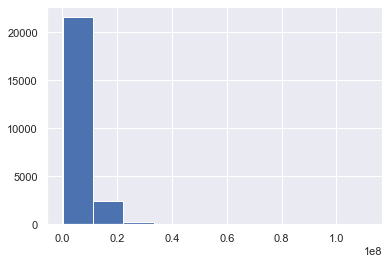

In [4]:
plt.hist(y)

In [5]:
df_test = pd.read_csv('mlcoursemm2021v2/test.csv')
X_test_nan = df_test.iloc[ : ,1 : ]
X_test_nan.head(6)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f281,f282,f283,f284,f285,f286,f287,f288,f289,f290
0,2014-03-29,63,63.0,11.0,17.0,1.0,NaN,2.0,1.0,NaN,...,5,1,1,0,2,12,0,1,10,0
1,2013-02-19,64,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,5,1,1,0,2,12,0,0,9,0
2,2013-09-18,40,NaN,4.0,17.0,1.0,NaN,1.0,1.0,NaN,...,636,371,141,26,150,249,2,105,203,13
3,2014-07-04,37,1.0,25.0,1.0,1.0,1.0,1.0,1.0,1.0,...,28,17,6,2,4,16,0,0,47,3
4,2014-09-24,127,58.0,11.0,20.0,1.0,2006.0,3.0,33.0,4.0,...,95,37,5,1,5,33,1,6,85,5
5,2013-03-04,43,29.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,...,33,23,15,0,9,20,1,3,68,1


In [6]:
for i in range(len(X_train_nan.columns)):
    print(X_train_nan.dtypes[i])

object
int64
float64
float64
float64
float64
float64
float64
float64
float64
object
object
float64
int64
float64
float64
int64
float64
int64
int64
float64
int64
int64
float64
int64
int64
int64
int64
object
int64
int64
int64
object
object
object
object
object
object
object
object
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
int64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
int64
float64
float64
float64
object
float64
float64
float64
float64
float64
float64
int64
object
float64
int64
float64
object
float64
int64
float64
int64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float

In [7]:
X_train_nan.describe()

,f2,f3,f4,f5,f6,f7,f8,f9,f10,f13,...,f281,f282,f283,f284,f285,f286,f287,f288,f289,f290
count,24376.000000,19265.000000,24242.000000,16726.000000,16726.000000,1.349100e+04,16726.000000,16726.000000,13534.000000,2.437600e+04,...,24376.000000,24376.000000,24376.000000,24376.000000,24376.000000,24376.000000,24376.000000,24376.000000,24376.000000,24376.000000
mean,54.240811,34.492759,7.684061,12.555064,1.834091,3.365373e+03,1.909781,6.229702,2.108911,1.773943e+07,...,63.592837,32.123031,10.798121,1.774532,15.096899,30.352068,0.443879,8.673490,52.838407,5.993354
std,40.939055,57.527014,5.325196,6.765722,1.487298,1.726222e+05,0.846089,22.318067,0.886838,2.081008e+07,...,124.484597,73.664193,28.438960,5.428966,29.221547,47.525878,0.609236,20.653677,46.373546,4.886120
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,2.081628e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.000000,20.000000,3.000000,9.000000,1.000000,1.967000e+03,1.000000,1.000000,1.000000,7.307411e+06,...,6.000000,2.000000,1.000000,0.000000,2.000000,9.000000,0.000000,0.000000,11.000000,1.000000
50%,49.000000,30.000000,7.000000,12.000000,1.000000,1.979000e+03,2.000000,6.000000,2.000000,1.050803e+07,...,24.000000,8.000000,2.000000,0.000000,7.000000,16.000000,0.000000,2.000000,48.000000,5.000000
75%,63.000000,43.000000,11.000000,17.000000,2.000000,2.005000e+03,2.000000,9.000000,3.000000,1.803644e+07,...,51.000000,21.000000,5.000000,0.000000,12.000000,28.000000,1.000000,7.000000,76.000000,10.000000
max,5326.000000,7478.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2013.000000,33.000000,2.060718e+08,...,641.000000,377.000000,147.000000,29.000000,151.000000,250.000000,2.000000,106.000000,218.000000,20.000000


In [8]:
X_all_nan = pd.concat((X_train_nan, X_test_nan), axis = 0)
print(X_all_nan.shape)

(30471, 290)


In [9]:
X_all_nan.reset_index(inplace = True, drop = True)

In [10]:
X_all_nan['f1'] = pd.to_datetime(X_all_nan['f1'], format='%Y-%m-%d')

In [11]:
extra = pd.read_csv('extra2.csv')
print(len(extra))
extra.head(6)

1712


,date,f291,f292,f293,f294,f295,f296,f297,f298,f299,...,f318,f319,f320,f321,f322,f323,f324,f325,f326,f327
0,40658,4649,7.54,27.9012,0.1,0.0,7.1,3.1,3.28,1158870,...,2.7,3.26,3.35,2.85,1139159,1139159,1132982,114.80,111.80,101.01
1,40659,4649,7.54,27.8072,0.1,0.0,7.1,3.1,3.42,1158870,...,2.7,3.26,3.21,2.71,1139159,1139159,1132982,115.16,115.42,101.74
2,40660,4649,7.54,27.7391,0.1,0.0,7.1,3.1,3.37,1158870,...,2.7,3.24,3.16,2.80,1139159,1139159,1132982,115.13,116.35,102.34
3,40661,4649,7.54,27.5152,0.1,0.0,7.1,3.1,3.60,1158870,...,2.7,3.27,3.19,2.95,1158870,1139159,1132982,117.36,114.79,101.76
4,40662,4649,7.54,27.3808,0.1,0.0,7.1,3.1,4.72,1158870,...,2.7,3.14,3.24,3.01,1158870,1139159,1132982,118.70,115.97,99.83
5,40663,4765,7.77,27.3808,0.1,0.0,7.2,3.3,4.72,1178915,...,2.7,3.14,3.22,3.01,1158870,1139159,1132982,118.70,115.97,99.83


In [12]:
X_train_nan['f1'] = pd.to_datetime(X_train_nan['f1'], format='%Y-%m-%d')
X_test_nan['f1'] = pd.to_datetime(X_test_nan['f1'], format='%Y-%m-%d')
df['f1'] = pd.to_datetime(df['f1'], format='%Y-%m-%d')

In [13]:
import datetime as dt
extra['f1'] = pd.TimedeltaIndex(extra['date'] - 2, unit='d') + dt.datetime(1900,1,1)
extra = extra.drop(columns = ['date'])
extra['f1'] = pd.to_datetime(extra['f1'], format='%Y-%m-%d')
X_all_nan = X_all_nan.join(extra.set_index('f1'), on = 'f1')

In [14]:
X_all_nan['f0'] = X_all_nan['f1']

In [15]:
all_dates = np.sort(pd.Series.unique(X_all_nan['f1']))
dates_dummy = np.arange(len(all_dates))

In [16]:
X_all_nan['f1'] = dates_dummy[[np.where(d == all_dates)[0][0] for d in X_all_nan['f0']]]

In [17]:
f0 = X_all_nan['f0']

In [18]:
X_all_nan = X_all_nan.drop(columns = ['f0'])

In [19]:
X_all_nan['dy'] = np.array([i.year for i in f0]) - ([j for j in X_all_nan['f7']])


In [20]:
X_all_nan = X_all_nan.drop(columns = ['f7'])
X_all_nan.head(3)

,f1,f2,f3,f4,f5,f6,f8,f9,f10,f11,...,f319,f320,f321,f322,f323,f324,f325,f326,f327,dy
0,726,69,38.0,7.0,10.0,1.0,2.0,11.0,2.0,Investment,...,4.95,6.44,6.26,2648859,2560014,2481457,110.80,111.88,105.24,13.0
1,785,55,NaN,2.0,1.0,4.0,2.0,10.0,NaN,OwnerOccupier,...,7.68,5.75,6.12,2746088,2682513,2648859,108.08,108.63,106.75,NaN
2,207,30,16.0,2.0,NaN,NaN,NaN,NaN,NaN,Investment,...,5.74,5.30,4.48,1539880,1501303,1478755,118.76,125.13,125.47,NaN


In [21]:
X_all_nan = pd.concat((X_all_nan, f0.dt.year, f0.dt.month, f0.dt.quarter, f0.dt.dayofweek), axis = 1)

In [22]:
X_all_nan.columns.values[-4] = 'year'
X_all_nan.columns.values[-3] = 'month'
X_all_nan.columns.values[-2] = 'quarter'
X_all_nan.columns.values[-1] = 'dayofweek'

In [23]:
df_dummy = pd.get_dummies(X_all_nan[X_all_nan.columns[X_all_nan.dtypes == 'object']], drop_first = True)

In [24]:
X_all_nan = pd.concat((X_all_nan, df_dummy), axis = 1)
X_all_nan = X_all_nan.drop(columns = X_all_nan.columns[X_all_nan.dtypes == 'object'])

In [25]:
X_all_nan = X_all_nan.apply(pd.to_numeric, axis = 1)

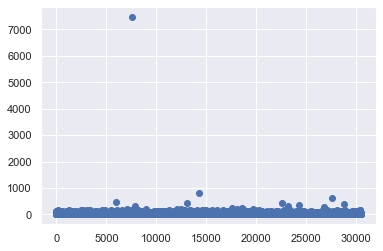

In [58]:
plt.scatter(X_all_nan.index, X_all_nan.iloc[:,2])

### 

In [26]:
X_median = X_train_nan.groupby(['f1']).mean()

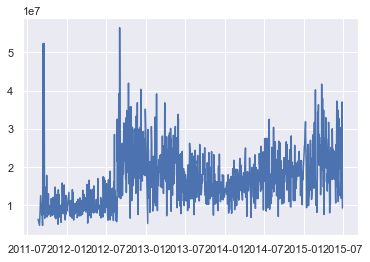

In [27]:
fig = plt.figure()
ax = plt.axes()
ax.plot(X_median.index, X_median['f13']);

In [28]:
X_median_2 = X_test_nan.groupby(['f1']).mean()

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax.plot(X_median_2.index, X_median_2['f13']);

In [ ]:
from sklearn.preprocessing import RobustScaler

<AxesSubplot:>

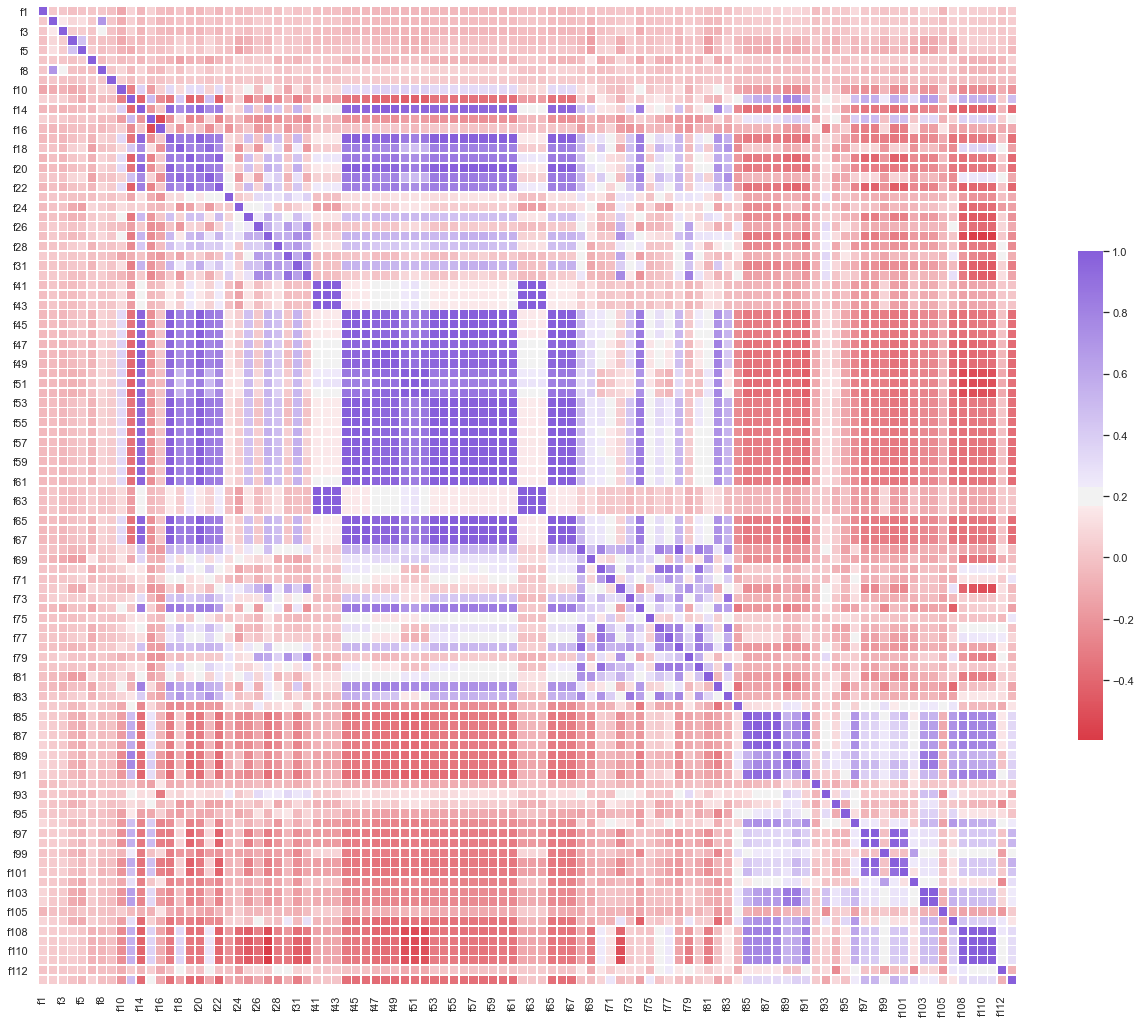

In [61]:
corr = X_all_nan.iloc[:,:100].corr(method = 'pearson')
f, ax = plt.subplots(figsize=(22, 18))
cmap = sns.diverging_palette(10, 275, as_cmap = True)
sns.heatmap(corr, cmap = cmap, square = True,
            linewidths = 0.5, cbar_kws = {"shrink": 0.5}, ax = ax)

In [60]:
X_all_nan[['f141', 'f142', 'f143']].corr(method = 'pearson')

,f141,f142,f143
f141,1.000000,0.829544,0.694233
f142,0.829544,1.000000,0.512168
f143,0.694233,0.512168,1.000000


In [29]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler().fit(X_all_nan)
X_all_nan_transformed = scaler.transform(X_all_nan)
X_all_nan_transformed = pd.DataFrame(X_all_nan_transformed)

In [30]:
X_all_transformed = X_all_nan_transformed.fillna(X_all_nan_transformed.median())
X_all_transformed

,0,1,2,3,4,5,6,7,8,9,...,468,469,470,471,472,473,474,475,476,477
0,-0.045872,0.80,0.347826,0.0625,-0.250,0.0,0.0,0.625,0.0,1.458390,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.089450,0.24,0.000000,-0.5625,-1.375,3.0,0.0,0.500,0.0,2.352489,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-1.236239,-0.76,-0.608696,-0.5625,0.000,0.0,0.0,0.000,0.0,-0.669363,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.727064,-0.20,0.565217,-0.6875,0.000,0.0,0.0,0.000,0.0,-0.244230,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.084862,-0.16,-0.086957,-0.4375,-0.875,1.0,0.0,-0.125,0.0,0.654158,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,0.584862,0.40,0.260870,0.9375,-1.375,0.0,0.0,0.375,0.0,-0.245061,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30467,0.247706,0.64,0.565217,0.4375,0.000,0.0,1.0,0.125,0.5,-0.542827,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30468,0.779817,0.16,0.000000,0.5625,0.000,0.0,0.0,0.250,0.5,-0.267973,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
30469,0.314220,-0.48,-0.521739,-0.1875,-0.875,0.0,-1.0,0.125,0.5,1.458390,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [31]:
X_all_transformed.columns = X_all_nan.columns

In [62]:
nan_values = X_all_nan.isna().sum()
i=0
for n in nan_values:
    print(i, '  ', X_all_nan.columns[i] ,'  ',n)
    i+=1

0    f1    0
1    f2    0
2    f3    6383
3    f4    167
4    f5    9572
5    f6    9572
6    f8    9572
7    f9    9572
8    f10    13559
9    f13    0
10    f14    0
11    f15    0
12    f16    0
13    f17    0
14    f18    6688
15    f19    0
16    f20    0
17    f21    6685
18    f22    0
19    f23    0
20    f24    14441
21    f25    0
22    f26    0
23    f27    0
24    f28    0
25    f30    0
26    f31    0
27    f32    0
28    f41    0
29    f42    0
30    f43    0
31    f44    0
32    f45    0
33    f46    0
34    f47    0
35    f48    0
36    f49    0
37    f50    0
38    f51    0
39    f52    0
40    f53    0
41    f54    0
42    f55    0
43    f56    0
44    f57    0
45    f58    0
46    f59    0
47    f60    0
48    f61    0
49    f62    0
50    f63    0
51    f64    0
52    f65    0
53    f66    0
54    f67    0
55    f68    4991
56    f69    4991
57    f70    4991
58    f71    4991
59    f72    4991
60    f73    4991
61    f74    4991
62    f75    4991
63    f76    4991


In [33]:
X_all_nan.columns[nan_values != 0]

Index(['f3', 'f4', 'f5', 'f6', 'f8', 'f9', 'f10', 'f18', 'f21', 'f24', 'f68',
       'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78',
       'f79', 'f80', 'f81', 'f82', 'f83', 'f87', 'f88', 'f97', 'f98', 'f99',
       'f160', 'f161', 'f162', 'f183', 'f184', 'f185', 'f206', 'f207', 'f208',
       'f229', 'f230', 'f231', 'f252', 'f253', 'f254', 'f269', 'f275', 'f276',
       'f277', 'dy'],
      dtype='object')

In [64]:
len(df)

24376

In [34]:
nan_factors = np.zeros((len(X_all_nan), len(X_all_nan.columns[nan_values != 0])))
for i in range(len(X_all_nan)):
    for j in range(len(X_all_nan.columns[nan_values != 0])):
        if isnan(X_all_nan.iloc[i,j]):
            nan_factors[i,j] = 1

nan_factors = pd.DataFrame(nan_factors)
nan_factors.head(5)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
nan_factors = nan_factors.loc[:, (nan_factors != 0).any(axis=0)]

In [36]:
nan_factors.index = X_all_transformed.index

In [37]:
X_all_transformed_expanded = pd.concat((X_all_transformed, nan_factors), axis = 1)
X_all_transformed_expanded.head(6)

,f1,f2,f3,f4,f5,f6,f8,f9,f10,f13,...,2,3,4,5,6,7,8,14,17,20
0,-0.045872,0.80,0.347826,0.0625,-0.250,0.0,0.0,0.625,0.0,1.458390,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.089450,0.24,0.000000,-0.5625,-1.375,3.0,0.0,0.500,0.0,2.352489,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
2,-1.236239,-0.76,-0.608696,-0.5625,0.000,0.0,0.0,0.000,0.0,-0.669363,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
3,-0.727064,-0.20,0.565217,-0.6875,0.000,0.0,0.0,0.000,0.0,-0.244230,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
4,-0.084862,-0.16,-0.086957,-0.4375,-0.875,1.0,0.0,-0.125,0.0,0.654158,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.286697,2.68,3.739130,0.1875,0.000,5.0,1.0,-0.625,-0.5,5.244131,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


In [38]:
X_all_transformed_expanded.columns[:316]

Index(['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f8', 'f9', 'f10', 'f13',
       ...
       'f323', 'f324', 'f325', 'f326', 'f327', 'dy', 'year', 'month',
       'quarter', 'dayofweek'],
      dtype='object', length=316)

In [39]:
X_all_transformed_expanded = pd.concat((X_all_transformed_expanded, X_all_transformed_expanded[X_all_transformed_expanded.columns[:316]].apply(lambda x: x ** 2)), axis = 1)
X_all_transformed_expanded.columns.values[-316:] = X_all_transformed_expanded.columns[-316:] + 'sqr'

In [40]:
X_all_transformed_expanded = pd.concat((X_all_transformed_expanded, X_all_transformed_expanded[X_all_transformed_expanded.columns[:316]].apply(lambda x: (x - min(x)) ** 0.5)), axis = 1)
X_all_transformed_expanded.columns.values[-316:] = X_all_transformed_expanded.columns[-316:] + 'sqrt'

In [41]:
X_all_transformed_expanded = pd.concat((X_all_transformed_expanded, X_all_transformed_expanded[X_all_transformed_expanded.columns[:316]].apply(lambda x: np.log(x - min(x) + 1))), axis = 1)
X_all_transformed_expanded.columns.values[-316:] = X_all_transformed_expanded.columns[-316:] + 'log'

In [42]:
#X_all_transformed_expanded = pd.concat((X_all_transformed_expanded, X_all_transformed_expanded[X_all_transformed_expanded.columns[:316]].apply(lambda x: np.exp(x))), axis = 1)
#X_all_transformed_expanded.columns.values[-316:] = X_all_transformed_expanded.columns[-316:] + 'exp'

In [43]:
X_all_transformed_expanded = pd.concat((X_all_transformed_expanded, X_all_transformed_expanded[X_all_transformed_expanded.columns[:316]].apply(lambda x: np.exp(-x**2))), axis = 1)
X_all_transformed_expanded.columns.values[-316:] = X_all_transformed_expanded.columns[-316:] + 'exp2'

In [44]:
X_all_transformed_expanded = pd.concat((X_all_transformed_expanded, X_all_transformed_expanded[X_all_transformed_expanded.columns[:316]].apply(lambda x: (x - min(x) + 1)**(-1))), axis = 1)
X_all_transformed_expanded.columns.values[-316:] = X_all_transformed_expanded.columns[-316:] + 'hip'

In [45]:
#X_all_transformed_expanded = pd.concat((X_all_transformed_expanded, X_all_transformed_expanded[X_all_transformed_expanded.columns[:316]].apply(lambda x: x ** 3)), axis = 1)
#X_all_transformed_expanded.columns.values[-316:] = X_all_transformed_expanded.columns[-316:] + 'cube'

In [46]:
np.shape(X_all_transformed_expanded)

(30471, 2068)

In [47]:
X = X_all_transformed_expanded.loc[ : 24375, : ]
X_test = X_all_transformed_expanded.loc[24376 : , : ]
X_test.reset_index(inplace = True, drop = True)
print(X.shape)
print(X_test.shape)

(24376, 2068)
(6095, 2068)


In [49]:
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lars
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import TweedieRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor
#from sklearn.linear_model import QuantileRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.svm import NuSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import VotingRegressor   
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.isotonic import IsotonicRegression

In [50]:
from joblib import dump, load
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [51]:
from sklearn.metrics import mean_squared_error

In [54]:
score = make_scorer(mean_squared_error, greater_is_better = False)

In [69]:
import xgboost as xgb

In [55]:
y_clean = np.log(y)

In [57]:
X_train, X_val, y_train, y_val = train_test_split(X, y_clean, test_size = 6100, random_state = 200)

In [ ]:
def cv_models(model, hyps, name_save):
    md = GridSearchCV(model, \
                     hyps, cv = 3, scoring = score, n_jobs = 7, verbose = 4)
    md_cv = md.fit(X_train, y_train)

    print(md.best_score_)
    print(' ')
    print(md.best_params_)
    dump(md_cv, name_save)
    return md_cv

In [ ]:
hyps_huber = {'epsilon': np.arange(1.5, 2, 0.2), 
              'alpha': [10, 20, 100]}

In [ ]:
huver_cv = cv_models(HuberRegressor(max_iter=20000), hyps_huber, 'huver_cv.joblib')

In [58]:
huver_cv = load('huver_cv.joblib')

In [ ]:
hyps_ridge = {'alpha': [10, 100, 10000, 20000, 30000, 40000, 50000, 60000, 70000]}

In [ ]:
ridge_cv = cv_models(Ridge(max_iter=20000), hyps_ridge, 'ridge_cv.joblib')

In [59]:
ridge_cv = load('ridge_cv.joblib')

In [ ]:
hyps_lsvr = {'C': [0.1, 1, 10, 100, 1000, 10000, 50000, 100000]}

In [ ]:
lsvr_cv = cv_models(LinearSVR(random_state = 10, dual = False, loss='squared_epsilon_insensitive'), hyps_lsvr, 'lsvr_cv.joblib')

In [60]:
lsvr_cv = load('lsvr_cv.joblib')

In [ ]:
hyps_svr = {'kernel': ['poly', 'rbf'],
            'C': [0.1, 1, 10, 100, 1000, 10000]}

In [ ]:
svr_cv = cv_models(SVR(), hyps_svr, 'svr_cv.joblib')

In [61]:
svr_cv = load('svr_cv.joblib')

In [ ]:
hyps_knr = {'n_neighbors': [5, 10, 15, 20],
            'weights': ['uniform', 'distance']}

In [ ]:
knr_cv = cv_models(KNeighborsRegressor(algorithm = 'brute'), hyps_knr, 'knr_cv.joblib')

In [62]:
knr_cv = load('knr_cv.joblib')

In [ ]:
hyps_dtr = {'max_depth': [3, 5, 10, 20, None],
           'min_samples_split': [2, 200, 300]}

In [ ]:
dtr_cv = cv_models(DecisionTreeRegressor(random_state = 40), hyps_dtr, 'dtr_cv.joblib')

In [63]:
dtr_cv = load('dtr_cv.joblib')

In [ ]:
hyps_rfr = {'max_samples': [0.8, 0.9, 0.95, 1.0]}

In [ ]:
rfr_cv = cv_models(RandomForestRegressor(n_estimators = 100, \
                                         n_jobs = 4, random_state = 40, verbose = 4), hyps_rfr, 'rfr_cv.joblib')

In [64]:
rfr_cv = load('rfr_cv.joblib')

In [ ]:
hyps_etr = {'max_depth': [5, 10, None]}

In [ ]:
efr_cv = cv_models(ExtraTreesRegressor(n_estimators = 100, \
                                         n_jobs = 4, random_state = 50, verbose = 4), hyps_etr, 'efr_cv.joblib')

In [65]:
efr_cv = load('efr_cv.joblib')

In [ ]:
hyps_gbr = {'learning_rate': [0.01, 0.1, 0.2],
           'subsample': [0.3, 0.5, 0.8, 1.0]}

In [ ]:
gbr_cv = cv_models(GradientBoostingRegressor(n_estimators = 100, validation_fraction = 0.1, max_depth = 5, \
                                             random_state = 50, verbose = 4), hyps_gbr, 'gbr_cv.joblib')

In [66]:
gbr_cv = load('gbr_cv.joblib')

In [ ]:
hyps_xgb = {'learning_rate': [0.1, 0.2, 0.3],
           'colsample_bytree': [0.3],
           'alpha': [0, 10, 100, 1000],
           'lambda': [0, 10, 100, 1000],
            'subsample': [0.5]}

In [ ]:
xgb_cv = cv_models(xgb.XGBRegressor(n_estimators = 100), hyps_xgb, 'xgb_cv.joblib')

In [67]:
xgb_cv = load('xgb_cv.joblib')

In [70]:
huber_model = HuberRegressor(max_iter=20000, **huver_cv.best_params_)
ridge_model = Ridge(max_iter=20000, **ridge_cv.best_params_)
lsvr_model = LinearSVR(random_state = 10, dual = False, loss='squared_epsilon_insensitive', **lsvr_cv.best_params_)
svr_model = SVR(**svr_cv.best_params_, max_iter = 1000)
knr_model = KNeighborsRegressor(algorithm = 'brute', **knr_cv.best_params_)
dtr_model = DecisionTreeRegressor(random_state = 40, **dtr_cv.best_params_)
rfr_model = RandomForestRegressor(n_estimators = 100, n_jobs = 4, random_state = 40,\
                                  verbose = 4, **rfr_cv.best_params_, max_features = 50)
efr_model = ExtraTreesRegressor(n_estimators = 100, n_jobs = 4, random_state = 50, \
                                verbose = 4,  **efr_cv.best_params_, max_features = 50)
gbr_model = GradientBoostingRegressor(n_estimators = 100, validation_fraction = 0.1,  max_depth = 5, \
                                             random_state = 50, verbose = 4, max_features = 50,  **gbr_cv.best_params_)
xgb_model = xgb.XGBRegressor(n_estimators = 100, **xgb_cv.best_params_)

In [ ]:
ada_huber_model = AdaBoostRegressor(base_estimator = huber_model, n_estimators = 50, random_state = 71)
ada_huber_model = ada_huber_model.fit(X_train, y_train)

In [ ]:
dump(ada_huber_model, 'ada_huber_model.joblib')

In [ ]:
ada_ridge_model = AdaBoostRegressor(base_estimator = ridge_model, n_estimators = 50, random_state = 72)
ada_ridge_model = ada_ridge_model.fit(X_train, y_train)

In [ ]:
dump(ada_ridge_model, 'ada_ridge_model.joblib')

In [ ]:
ada_lsvr_model = AdaBoostRegressor(base_estimator = lsvr_model, n_estimators = 50, random_state = 73)
ada_lsvr_model = ada_lsvr_model.fit(X_train, y_train)

In [ ]:
dump(ada_lsvr_model, 'ada_lsvr_model.joblib')

In [ ]:
ada_knr_model = AdaBoostRegressor(base_estimator = knr_model, n_estimators = 10, random_state = 75)
ada_knr_model = ada_knr_model.fit(X_train, y_train)

In [ ]:
dump(ada_knr_model, 'ada_knr_model.joblib')

In [ ]:
ada_dtr_model = AdaBoostRegressor(base_estimator = dtr_model, n_estimators = 50, random_state = 76)
ada_dtr_model = ada_dtr_model.fit(X_train, y_train)

In [ ]:
dump(ada_dtr_model, 'ada_dtr_model.joblib')

In [ ]:
ada_rfr_model = AdaBoostRegressor(base_estimator = rfr_model, n_estimators = 10, random_state = 77)
ada_rfr_model = ada_rfr_model.fit(X_train, y_train)

In [ ]:
dump(ada_rfr_model, 'ada_rfr_model.joblib')

In [ ]:
ada_efr_model = AdaBoostRegressor(base_estimator = efr_model, n_estimators = 10, random_state = 78)
ada_efr_model = ada_efr_model.fit(X_train, y_train)

In [ ]:
dump(ada_efr_model, 'ada_efr_model.joblib')

In [ ]:
ada_gbr_model = AdaBoostRegressor(base_estimator = gbr_model, n_estimators = 10, random_state = 79)
ada_gbr_model = ada_gbr_model.fit(X_train, y_train)

In [ ]:
dump(ada_gbr_model, 'ada_gbr_model.joblib')

In [ ]:
ada_xgb_model = AdaBoostRegressor(base_estimator = xgb_model, n_estimators = 10, random_state = 80)
ada_xgb_model = ada_xgb_model.fit(X_train, y_train)

In [ ]:
dump(ada_xgb_model, 'ada_xgb_model.joblib')

In [ ]:
test_model = svr_model.fit(X_train, y_train)

In [ ]:
bag_ridge_model = BaggingRegressor(base_estimator = ridge_model, n_estimators = 50,\
                                   verbose = 4, n_jobs = 6, random_state = 82)
bag_ridge_model = bag_ridge_model.fit(X_train, y_train)

In [ ]:
dump(bag_ridge_model, 'bag_ridge_model.joblib')

In [ ]:
bag_lsvr_model = BaggingRegressor(base_estimator = lsvr_model, n_estimators = 50,\
                                   verbose = 4, n_jobs = 6, random_state = 83)
bag_lsvr_model = bag_lsvr_model.fit(X_train, y_train)

In [ ]:
dump(bag_lsvr_model, 'bag_lsvr_model.joblib')

In [ ]:
bag_knr_model = BaggingRegressor(base_estimator = knr_model, n_estimators = 10,\
                                verbose = 4, n_jobs = 6, random_state = 85)
bag_knr_model = bag_knr_model.fit(X_train, y_train)

In [ ]:
dump(bag_knr_model, 'bag_knr_model.joblib')

In [ ]:
bag_dtr_model = BaggingRegressor(base_estimator = dtr_model, n_estimators = 50,\
                                 verbose = 4, n_jobs = 6, random_state = 86)
bag_dtr_model = bag_dtr_model.fit(X_train, y_train)

In [ ]:
dump(bag_dtr_model, 'bag_dtr_model.joblib')

In [ ]:
bag_rfr_model = BaggingRegressor(base_estimator = rfr_model, n_estimators = 10,\
                                 verbose = 4, n_jobs = 6, random_state = 87)
bag_rfr_model = bag_rfr_model.fit(X_train, y_train)

In [ ]:
dump(bag_rfr_model, 'bag_rfr_model.joblib')

In [ ]:
bag_efr_model = BaggingRegressor(base_estimator = efr_model, n_estimators = 10,\
                                   verbose = 4, n_jobs = 6, random_state = 88)
bag_efr_model = bag_efr_model.fit(X_train, y_train)

In [ ]:
dump(bag_efr_model, 'bag_efr_model.joblib')

In [ ]:
bag_gbr_model = BaggingRegressor(base_estimator = gbr_model, n_estimators = 10,\
                                verbose = 4, n_jobs = 6, random_state = 89)
bag_gbr_model = bag_gbr_model.fit(X_train, y_train)

In [ ]:
dump(bag_gbr_model, 'bag_gbr_model.joblib')

In [ ]:
bag_xgb_model = BaggingRegressor(base_estimator = xgb_model, n_estimators = 10,\
                                verbose = 4, n_jobs = 6, random_state = 90)
bag_xgb_model = bag_xgb_model.fit(X_train, y_train)

In [ ]:
dump(bag_xgb_model, 'bag_xgb_model.joblib')

In [111]:
estimators = [('ridge', ridge_model), \
                                
                                ('lsvr', lsvr_model), \
                                      
                                ('svr', svr_model), \
                                
                                ('knr', knr_model), \
                                
                                ('dtr', dtr_model), \
                                
                                ('rfr', rfr_model), \
                                                                
                                ('efr', efr_model), \
                                      
                                ('gbr', gbr_model), \
             ('xgb', xgb_model)]

In [ ]:
vrens = VotingRegressor(estimators,\
                                verbose = 4, n_jobs = 6)

In [ ]:
vrens = vrens.fit(X_train, y_train)

In [ ]:
dump(vrens, 'vrens.joblib')

In [ ]:
stacks = StackingRegressor(estimators, cv = 3, \
                                verbose = 4, n_jobs = 6)

In [ ]:
stacks = stacks.fit(X_train, y_train)

In [ ]:
dump(stacks, 'stacks.joblib')

In [ ]:
all_models_train = [huver_cv, ridge_cv, lsvr_cv, svr_cv, knr_cv, dtr_cv, rfr_cv, efr_cv, gbr_cv, xgb_cv, \
                   ada_huber_model, ada_ridge_model, ada_lsvr_model, ada_knr_model, ada_dtr_model, \
                    ada_rfr_model, ada_efr_model, ada_gbr_model, ada_xgb_model, \
                   bag_huber_model, bag_ridge_model, bag_lsvr_model, bag_knr_model, bag_dtr_model, \
                    bag_rfr_model, bag_efr_model, bag_gbr_model, bag_xgb_model,\
                   vrens, stacks]

In [ ]:
y_val_preds = []
i = 0 
for m in all_models_train:
    print(i, '  ', m)
    i += 1
    y_val_preds.append(m.predict(X_val))

In [ ]:
dump(y_val_preds, 'y_val_preds.joblib')

In [ ]:
y_val_preds = load('y_val_preds.joblib')

In [ ]:
y_val_preds_array = np.zeros((6100, 30))

In [ ]:
for i in range(30):
    y_val_preds_array[:,i] = y_val_preds[i]

In [ ]:
 def get_weights(w):
        y_to_do = y_val_preds_array
        y_true = y_val
        w_arit = w
        #w_geom =  w[30:60]
        #w_harm = w[60:90]
        #w1 = w[90]
        #w2 = w[91]
        #w3 = w[93]
        arit_preds = np.mean(w_arit * y_to_do, axis = 1)
        #geom_preds = np.mean(w_geom * y_to_do, axis = 0)
        #harm_preds = np.mean(harm_preds * y_to_do, axis = 0)
        #all_pred = w1 * arit_preds + w2 * geom_preds + w3 * harm_preds
        target_score = mean_squared_error(y_true, arit_preds)
        return target_score

In [ ]:
from mealpy.bio_based import SMA
from mealpy.evolutionary_based import DE
from mealpy.math_based import HC

In [ ]:
problem_dict1 = {
    "obj_func": get_weights,
    "lb": [-10.0, ] * 30,
    "ub": [10.0, ] * 30,
    "minmax": "min",
    "verbose": True,
}

In [ ]:
optmod = SMA.BaseSMA(problem_dict1, epoch = 1000, pop_size = 1000)
optmod.solve()

In [ ]:
final_weights = optmod.solution[0]

In [ ]:
final_weights

In [71]:
final_huber = HuberRegressor(max_iter=20000, **huver_cv.best_params_)
final_huber = final_huber.fit(X, y_clean)

In [72]:
dump(final_huber, 'final_huber.joblib')

['final_huber.joblib']

In [73]:
final_ridge = Ridge(max_iter=20000, **ridge_cv.best_params_)
final_ridge = final_ridge.fit(X, y_clean)

In [74]:
dump(final_ridge, 'final_ridge.joblib')

['final_ridge.joblib']

In [75]:
final_lsvr = LinearSVR(random_state = 10, dual = False, loss='squared_epsilon_insensitive', **lsvr_cv.best_params_)
final_lsvr = final_lsvr.fit(X, y_clean)

In [76]:
dump(final_lsvr, 'final_lsvr.joblib')

['final_lsvr.joblib']

In [77]:
final_svr = SVR(**svr_cv.best_params_)
final_svr = final_svr.fit(X, y_clean)

In [78]:
dump(final_svr, 'final_svr.joblib')

['final_svr.joblib']

In [79]:
final_knr = KNeighborsRegressor(algorithm = 'brute', **knr_cv.best_params_)
final_knr = final_knr.fit(X, y_clean)

In [80]:
dump(final_knr, 'final_knr.joblib')

['final_knr.joblib']

In [81]:
final_dtr = DecisionTreeRegressor(random_state = 40, **dtr_cv.best_params_)
final_dtr = final_dtr.fit(X, y_clean)

In [82]:
dump(final_dtr, 'final_dtr.joblib')

['final_dtr.joblib']

In [83]:
final_rfr = RandomForestRegressor(n_estimators = 100, n_jobs = 4, random_state = 40,\
                                  verbose = 4, **rfr_cv.best_params_)
final_rfr = final_rfr.fit(X, y_clean)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100building tree 2 of 100building tree 3 of 100

building tree 4 of 100

building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100


[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  4.5min


building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62

[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed: 20.0min


building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed: 21.9min finished


In [84]:
dump(final_rfr, 'final_rfr.joblib')

['final_rfr.joblib']

In [85]:
final_efr = ExtraTreesRegressor(n_estimators = 100, n_jobs = 4, random_state = 50, \
                                verbose = 4,  **efr_cv.best_params_)
final_efr = final_efr.fit(X, y_clean)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100


[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  2.6min


building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62

[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed: 12.1min


building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed: 13.1min finished


In [86]:
dump(final_efr, 'final_efr.joblib')

['final_efr.joblib']

In [87]:
final_gbr = GradientBoostingRegressor(n_estimators = 100, validation_fraction = 0.1,  max_depth = 5, \
                                             random_state = 50, verbose = 4,  **gbr_cv.best_params_)
final_gbr = final_gbr.fit(X, y_clean)

      Iter       Train Loss   Remaining Time 
         1           0.3397           13.63m
         2           0.3189           13.94m
         3           0.3017           13.64m
         4           0.2873           13.56m
         5           0.2751           13.44m
         6           0.2651           13.19m
         7           0.2566           12.86m
         8           0.2493           12.76m
         9           0.2432           12.63m
        10           0.2377           12.60m
        11           0.2328           12.82m
        12           0.2285           13.26m
        13           0.2250           13.15m
        14           0.2218           12.83m
        15           0.2188           12.55m
        16           0.2159           12.30m
        17           0.2136           12.07m
        18           0.2115           11.85m
        19           0.2095           11.63m
        20           0.2075           11.46m
        21           0.2057           11.25m
        2

In [88]:
dump(final_gbr, 'final_gbr.joblib')

['final_gbr.joblib']

In [89]:
final_xgb = xgb.XGBRegressor(n_estimators = 100, **xgb_cv.best_params_)
final_xgb = final_xgb.fit(X, y_clean)

In [90]:
dump(final_xgb, 'final_xgb.joblib')

['final_xgb.joblib']

In [91]:
final_ada_huber = AdaBoostRegressor(base_estimator = huber_model, n_estimators = 50, random_state = 71)
final_ada_huber = final_ada_huber.fit(X, y_clean)

dump(final_ada_huber, 'final_ada_huber.joblib')

['final_ada_huber.joblib']

In [92]:
final_ada_ridge = AdaBoostRegressor(base_estimator = ridge_model, n_estimators = 50, random_state = 72)
final_ada_ridge = final_ada_ridge.fit(X, y_clean)

dump(final_ada_ridge, 'final_ada_ridge.joblib')

['final_ada_ridge.joblib']

In [93]:
final_ada_lsvr = AdaBoostRegressor(base_estimator = lsvr_model, n_estimators = 50, random_state = 73)
final_ada_lsvr = final_ada_lsvr.fit(X, y_clean)

dump(final_ada_lsvr, 'final_ada_lsvr.joblib')

['final_ada_lsvr.joblib']

In [94]:
final_ada_knr = AdaBoostRegressor(base_estimator = knr_model, n_estimators = 10, random_state = 75)
final_ada_knr = final_ada_knr.fit(X, y_clean)

dump(final_ada_knr, 'final_ada_knr.joblib')


['final_ada_knr.joblib']

In [95]:
final_ada_dtr = AdaBoostRegressor(base_estimator = dtr_model, n_estimators = 50, random_state = 76)
final_ada_dtr = final_ada_dtr.fit(X, y_clean)

dump(final_ada_dtr, 'final_ada_dtr.joblib')

['final_ada_dtr.joblib']

In [96]:
final_ada_rfr = AdaBoostRegressor(base_estimator = rfr_model, n_estimators = 10, random_state = 77)
final_ada_rfr = final_ada_rfr.fit(X, y_clean)

dump(final_ada_rfr, 'final_ada_rfr.joblib')

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100

building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100


[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    5.1s


building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66

[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:   25.8s


building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   28.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100


[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    5.4s


building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62

[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:   26.2s


building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   29.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100
building tree 4 of 100

building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100


[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    6.0s


building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62

[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:   29.4s


building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   32.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100

building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100


[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    5.9s


building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100building tree 30 of 100

building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62

[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:   29.1s


building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   31.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100


[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    5.8s


building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62

[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:   29.3s


building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   32.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100

building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100


[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    5.5s


building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62

[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:   26.0s


building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   28.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100
building tree 4 of 100

building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100

[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    5.6s



building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 6

[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:   26.0s



building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   28.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100


[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    5.2s


building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62

[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:   25.8s


building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   28.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100building tree 2 of 100building tree 3 of 100
building tree 4 of 100


building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100


[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    5.3s


building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65

[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:   26.1s


building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   29.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100

building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100building tree 10 of 100

building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100


[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    5.6s


building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62

[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:   27.6s


building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   29.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.5s finished


['final_ada_rfr.joblib']

In [97]:
final_ada_efr = AdaBoostRegressor(base_estimator = efr_model, n_estimators = 10, random_state = 78)
final_ada_efr = final_ada_efr.fit(X, y_clean)

dump(final_ada_efr, 'final_ada_efr.joblib')

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100


[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    4.5s


building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62

[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:   18.4s


building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   19.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100


[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    3.2s


building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62

[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:   15.5s


building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   17.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100


[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    4.1s


building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100building tree 58 of 100

building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62

[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:   19.5s


building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   21.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100building tree 2 of 100building tree 3 of 100
building tree 4 of 100


building tree 5 of 100building tree 6 of 100

building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100


[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    4.5s


building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100building tree 62 

[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:   19.8s


building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   21.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100


[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    3.4s


building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62

[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:   18.0s


building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   19.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100building tree 11 of 100

building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100


[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    4.0s


building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62

[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:   22.2s


building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   24.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100


[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    4.1s


building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62

[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:   19.9s



building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   21.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100
building tree 4 of 100

building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100


[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    3.5s


building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62

[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:   17.3s


building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   18.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100
building tree 4 of 100

building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100


[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    4.0s


building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100building tree 58 of 100

building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62

[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:   20.7s


building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   22.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100building tree 8 of 100

building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100


[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    3.8s


building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66

[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:   18.0s


building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   20.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.6s finished


['final_ada_efr.joblib']

In [98]:
final_ada_gbr = AdaBoostRegressor(base_estimator = gbr_model, n_estimators = 10, random_state = 79)
final_ada_gbr = final_ada_gbr.fit(X, y_clean)

dump(final_ada_gbr, 'final_ada_gbr.joblib')

      Iter       Train Loss   Remaining Time 
         1           0.3462           33.66s
         2           0.3310           34.34s
         3           0.3146           32.55s
         4           0.3036           30.33s
         5           0.2905           29.06s
         6           0.2785           28.10s
         7           0.2699           27.21s
         8           0.2614           26.55s
         9           0.2560           26.06s
        10           0.2504           25.68s
        11           0.2438           25.29s
        12           0.2390           24.92s
        13           0.2350           24.76s
        14           0.2303           24.62s
        15           0.2272           24.71s
        16           0.2231           24.50s
        17           0.2197           24.17s
        18           0.2171           23.83s
        19           0.2135           23.52s
        20           0.2105           23.37s
        21           0.2075           23.50s
        2

        82           0.2566            4.37s
        83           0.2555            4.13s
        84           0.2547            3.88s
        85           0.2533            3.64s
        86           0.2528            3.40s
        87           0.2521            3.16s
        88           0.2507            2.92s
        89           0.2497            2.67s
        90           0.2490            2.43s
        91           0.2477            2.19s
        92           0.2465            1.95s
        93           0.2457            1.70s
        94           0.2445            1.46s
        95           0.2435            1.22s
        96           0.2430            0.97s
        97           0.2419            0.73s
        98           0.2411            0.49s
        99           0.2401            0.24s
       100           0.2393            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.7033           22.50s
         2           0.6859           22.86s
         

        63           0.4563            8.93s
        64           0.4549            8.70s
        65           0.4539            8.47s
        66           0.4518            8.24s
        67           0.4478            8.00s
        68           0.4468            7.76s
        69           0.4449            7.52s
        70           0.4430            7.28s
        71           0.4417            7.03s
        72           0.4394            6.82s
        73           0.4379            6.59s
        74           0.4364            6.35s
        75           0.4354            6.12s
        76           0.4324            5.87s
        77           0.4303            5.63s
        78           0.4281            5.38s
        79           0.4257            5.13s
        80           0.4230            4.89s
        81           0.4215            4.64s
        82           0.4195            4.40s
        83           0.4184            4.15s
        84           0.4173            3.91s
        85

        44           0.6285           15.08s
        45           0.6244           14.80s
        46           0.6230           14.53s
        47           0.6172           14.23s
        48           0.6134           13.94s
        49           0.6105           13.66s
        50           0.6074           13.38s
        51           0.6011           13.10s
        52           0.5962           12.82s
        53           0.5933           12.53s
        54           0.5906           12.26s
        55           0.5840           11.98s
        56           0.5810           11.69s
        57           0.5759           11.43s
        58           0.5729           11.15s
        59           0.5689           10.88s
        60           0.5653           10.61s
        61           0.5588           10.33s
        62           0.5537           10.06s
        63           0.5509            9.80s
        64           0.5476            9.53s
        65           0.5444            9.26s
        66

        25           0.7819           23.51s
        26           0.7747           23.05s
        27           0.7663           22.56s
        28           0.7603           22.16s
        29           0.7526           21.68s
        30           0.7442           21.22s
        31           0.7375           20.79s
        32           0.7309           20.41s
        33           0.7245           20.03s
        34           0.7211           19.68s
        35           0.7166           19.50s
        36           0.7129           19.17s
        37           0.7086           18.77s
        38           0.7063           18.41s
        39           0.7017           18.06s
        40           0.6939           17.70s
        41           0.6894           17.35s
        42           0.6861           16.98s
        43           0.6827           16.62s
        44           0.6758           16.29s
        45           0.6702           16.00s
        46           0.6672           15.70s
        47

         6           1.0076           22.20s
         7           0.9947           21.80s
         8           0.9800           21.53s
         9           0.9617           21.30s
        10           0.9498           21.10s
        11           0.9336           20.85s
        12           0.9208           20.60s
        13           0.9109           20.25s
        14           0.9022           20.04s
        15           0.8935           19.89s
        16           0.8848           19.69s
        17           0.8770           19.42s
        18           0.8657           19.18s
        19           0.8571           18.99s
        20           0.8543           18.81s
        21           0.8489           18.61s
        22           0.8432           18.45s
        23           0.8339           18.24s
        24           0.8274           18.08s
        25           0.8179           17.89s
        26           0.8107           17.70s
        27           0.8035           17.47s
        28

['final_ada_gbr.joblib']

In [99]:
final_ada_xgb = AdaBoostRegressor(base_estimator = xgb_model, n_estimators = 10, random_state = 80)
final_ada_xgb = final_ada_xgb.fit(X, y_clean)

dump(final_ada_xgb, 'final_ada_xgb.joblib')

['final_ada_xgb.joblib']

In [100]:
final_bag_huber = BaggingRegressor(base_estimator=HuberRegressor(alpha=20, epsilon=1.7,
                                               max_iter=20000),
                 n_estimators=50, n_jobs=6, random_state=81, verbose=4)
final_bag_huber = final_bag_huber.fit(X, y_clean)

dump(final_bag_huber, 'final_bag_huber.joblib')

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   3 out of   6 | elapsed:  7.1min remaining:  7.1min
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:  8.0min finished


['final_bag_huber.joblib']

In [101]:
final_bag_ridge = BaggingRegressor(base_estimator = ridge_model, n_estimators = 50,\
                                   verbose = 4, n_jobs = 6, random_state = 82)
final_bag_ridge = final_bag_ridge.fit(X, y_clean)

dump(final_bag_ridge, 'final_bag_ridge.joblib')


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   3 out of   6 | elapsed:  1.7min remaining:  1.7min
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:  1.8min finished


['final_bag_ridge.joblib']

In [102]:
final_bag_lsvr = BaggingRegressor(base_estimator = lsvr_model, n_estimators = 50,\
                                   verbose = 4, n_jobs = 6, random_state = 83)
final_bag_lsvr = final_bag_lsvr.fit(X, y_clean)

dump(final_bag_lsvr, 'final_bag_lsvr.joblib')

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   3 out of   6 | elapsed:  1.0min remaining:  1.0min
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:  1.1min finished


['final_bag_lsvr.joblib']

In [103]:
final_bag_knr = BaggingRegressor(base_estimator = knr_model, n_estimators = 8,\
                                verbose = 4, n_jobs = 6, random_state = 85)
final_bag_knr = final_bag_knr.fit(X, y_clean)

dump(final_bag_knr, 'final_bag_knr.joblib')

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   3 out of   6 | elapsed:    8.5s remaining:    8.5s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:   12.1s finished


['final_bag_knr.joblib']

In [104]:
final_bag_dtr = BaggingRegressor(base_estimator = dtr_model, n_estimators = 50,\
                                 verbose = 4, n_jobs = 6, random_state = 86)
final_bag_dtr = final_bag_dtr.fit(X, y_clean)

dump(final_bag_dtr, 'final_bag_dtr.joblib')

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   3 out of   6 | elapsed:  3.5min remaining:  3.5min
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:  3.8min finished


['final_bag_dtr.joblib']

In [105]:
final_bag_rfr = BaggingRegressor(base_estimator = rfr_model, n_estimators = 10,\
                                 verbose = 4, n_jobs = 6, random_state = 87)
final_bag_rfr = final_bag_rfr.fit(X, y_clean)

dump(final_bag_rfr, 'final_bag_rfr.joblib')

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   3 out of   6 | elapsed:  2.4min remaining:  2.4min
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:  2.5min finished


['final_bag_rfr.joblib']

In [106]:
final_bag_efr = BaggingRegressor(base_estimator = efr_model, n_estimators = 10,\
                                   verbose = 4, n_jobs = 6, random_state = 88)
final_bag_efr = final_bag_efr.fit(X, y_clean)

dump(final_bag_efr, 'final_bag_efr.joblib')

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   3 out of   6 | elapsed:  1.9min remaining:  1.9min
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:  1.9min finished


['final_bag_efr.joblib']

In [107]:
final_bag_gbr = BaggingRegressor(base_estimator = gbr_model, n_estimators = 10,\
                                verbose = 4, n_jobs = 6, random_state = 89)
final_bag_gbr = final_bag_gbr.fit(X, y_clean)

dump(final_bag_gbr, 'final_bag_gbr.joblib')

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   3 out of   6 | elapsed:  1.2min remaining:  1.2min
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:  1.2min finished


['final_bag_gbr.joblib']

In [109]:
final_bag_xgb = BaggingRegressor(base_estimator = xgb_model, n_estimators = 6,\
                                verbose = 4, n_jobs = 6, random_state = 90)
final_bag_xgb = final_bag_xgb.fit(X, y_clean)

dump(final_bag_xgb, 'final_bag_xgb.joblib')

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   3 out of   6 | elapsed:  3.8min remaining:  3.8min
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:  3.8min finished


['final_bag_xgb.joblib']

In [112]:
final_vote = VotingRegressor(estimators,\
                                verbose = 4, n_jobs = 6)

final_vote = final_vote.fit(X, y_clean)

dump(final_vote, 'final_vote.joblib')

['final_vote.joblib']

In [113]:
final_stacks = StackingRegressor(estimators, cv = 2, \
                                verbose = 4, n_jobs = 6)

final_stacks = final_stacks.fit(X, y_clean)

dump(final_stacks, 'final_stacks.joblib')

['final_stacks.joblib']

In [114]:
all_models_final = [final_huber, final_ridge, final_lsvr, final_svr, final_knr, final_dtr, final_rfr,\
                    final_efr, final_gbr, final_xgb, \
                   final_ada_huber, final_ada_ridge, final_ada_lsvr, final_ada_knr, final_ada_dtr, \
                    final_ada_rfr, final_ada_efr, final_ada_gbr, final_ada_xgb, \
                   final_bag_huber, final_bag_ridge, final_bag_lsvr, final_bag_knr, final_bag_dtr, \
                    final_bag_rfr, final_bag_efr, final_bag_gbr, final_bag_xgb,\
                   final_vote, final_stacks]

In [115]:
y_train_all_preds = []
i = 0 
for m in all_models_final:
    print(i, '  ', m)
    i += 1
    y_train_all_preds.append(m.predict(X))

0    HuberRegressor(alpha=20, epsilon=1.7, max_iter=20000)
1    Ridge(alpha=20000, max_iter=20000)
2    LinearSVR(C=10000, dual=False, loss='squared_epsilon_insensitive',
          random_state=10)
3    SVR(C=10000)
4    KNeighborsRegressor(algorithm='brute', n_neighbors=15, weights='distance')
5    DecisionTreeRegressor(max_depth=10, min_samples_split=200, random_state=40)
6    RandomForestRegressor(max_samples=0.95, n_jobs=4, random_state=40, verbose=4)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.0s finished


7    ExtraTreesRegressor(n_jobs=4, random_state=50, verbose=4)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.1s finished


8    GradientBoostingRegressor(max_depth=5, random_state=50, verbose=4)
9    XGBRegressor(alpha=100, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='', lambda=10,
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=100, reg_lambda=10, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)
10    AdaBoostRegressor(base_estimator=HuberRegressor(alpha=20, epsilon=1.7,
                                                max_iter=20000),
                  random_state=71)
11    AdaBoostRegressor(base_estimator=Ridge(alpha=20000, max_iter=20000),
                  random_state=72)
12    AdaBoostRegressor(base_estimator=Li

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  90 tasks      |

16    AdaBoostRegressor(base_estimator=ExtraTreesRegressor(max_features=50, n_jobs=4,
                                                     random_state=50,
                                                     verbose=4),
                  n_estimators=10, random_state=78)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  90 tasks      |

17    AdaBoostRegressor(base_estimator=GradientBoostingRegressor(max_depth=5,
                                                           max_features=50,
                                                           random_state=50,
                                                           verbose=4),
                  n_estimators=10, random_state=79)
18    AdaBoostRegressor(base_estimator=XGBRegressor(alpha=100, base_score=None,
                                              booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.3, gamma=None,
                                              gpu_id=None,
                                              importance_type='gain',
                                              interaction_constraints=None,
                                              lambda=10, learning_rate=0.1,
       

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   3 out of   6 | elapsed:   10.5s remaining:   10.5s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:   10.8s finished


20    BaggingRegressor(base_estimator=Ridge(alpha=20000, max_iter=20000),
                 n_estimators=50, n_jobs=6, random_state=82, verbose=4)


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   3 out of   6 | elapsed:    6.5s remaining:    6.5s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    7.1s finished


21    BaggingRegressor(base_estimator=LinearSVR(C=10000, dual=False,
                                          loss='squared_epsilon_insensitive',
                                          random_state=10),
                 n_estimators=50, n_jobs=6, random_state=83, verbose=4)


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   3 out of   6 | elapsed:    6.2s remaining:    6.2s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    6.4s finished


22    BaggingRegressor(base_estimator=KNeighborsRegressor(algorithm='brute',
                                                    n_neighbors=15,
                                                    weights='distance'),
                 n_estimators=8, n_jobs=6, random_state=85, verbose=4)


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   3 out of   6 | elapsed:  6.9min remaining:  6.9min
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:  8.6min finished


23    BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=10,
                                                      min_samples_split=200,
                                                      random_state=40),
                 n_estimators=50, n_jobs=6, random_state=86, verbose=4)


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   3 out of   6 | elapsed:    6.7s remaining:    6.7s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    7.0s finished


24    BaggingRegressor(base_estimator=RandomForestRegressor(max_features=50,
                                                      max_samples=0.95,
                                                      n_jobs=4, random_state=40,
                                                      verbose=4),
                 n_jobs=6, random_state=87, verbose=4)


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   3 out of   6 | elapsed:   12.7s remaining:   12.7s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:   17.4s finished


25    BaggingRegressor(base_estimator=ExtraTreesRegressor(max_features=50, n_jobs=4,
                                                    random_state=50,
                                                    verbose=4),
                 n_jobs=6, random_state=88, verbose=4)


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   3 out of   6 | elapsed:   14.0s remaining:   14.0s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:   20.7s finished


26    BaggingRegressor(base_estimator=GradientBoostingRegressor(max_depth=5,
                                                          max_features=50,
                                                          random_state=50,
                                                          verbose=4),
                 n_jobs=6, random_state=89, verbose=4)


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   3 out of   6 | elapsed:    4.0s remaining:    4.0s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    4.3s finished


27    BaggingRegressor(base_estimator=XGBRegressor(alpha=100, base_score=None,
                                             booster=None,
                                             colsample_bylevel=None,
                                             colsample_bynode=None,
                                             colsample_bytree=0.3, gamma=None,
                                             gpu_id=None,
                                             importance_type='gain',
                                             interaction_constraints=None,
                                             lambda=10, learning_rate=0.1,
                                             max_delta_step=None,
                                             max_depth=None,
                                             min_child_weight=None, missing=nan,
                                             monotone_constraints=None,
                                             n_estimators=100, n_jobs=None,
             

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   3 out of   6 | elapsed:    7.2s remaining:    7.2s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    7.2s finished


28    VotingRegressor(estimators=[('ridge', Ridge(alpha=20000, max_iter=20000)),
                            ('lsvr',
                             LinearSVR(C=10000, dual=False,
                                       loss='squared_epsilon_insensitive',
                                       random_state=10)),
                            ('svr', SVR(C=10000, max_iter=1000)),
                            ('knr',
                             KNeighborsRegressor(algorithm='brute',
                                                 n_neighbors=15,
                                                 weights='distance')),
                            ('dtr',
                             DecisionTreeRegressor(max_depth=10,
                                                   min_samples_split=200,
                                                   random_s...
                                          interaction_constraints=None,
                                          lambda=10, learning_rate=0.1,
 

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.1s finished


29    StackingRegressor(cv=2,
                  estimators=[('ridge', Ridge(alpha=20000, max_iter=20000)),
                              ('lsvr',
                               LinearSVR(C=10000, dual=False,
                                         loss='squared_epsilon_insensitive',
                                         random_state=10)),
                              ('svr', SVR(C=10000, max_iter=1000)),
                              ('knr',
                               KNeighborsRegressor(algorithm='brute',
                                                   n_neighbors=15,
                                                   weights='distance')),
                              ('dtr',
                               DecisionTreeRegressor(max_depth=10,
                                                     min_samples_split=200,
                                                     r...
                                            interaction_constraints=None,
                          

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.9s finished


In [116]:
dump(y_train_all_preds, 'y_train_all_preds.joblib')

['y_train_all_preds.joblib']

In [123]:
y_train_all_preds_array = np.zeros((len(y_clean), 30))

In [124]:
for i in range(30):
    y_train_all_preds_array[:,i] = y_train_all_preds[i]



In [ ]:
arit_preds = np.mean(final_weights * y_train_all_preds_array, axis = 1)

In [119]:
y_test_all_preds = []
i = 0 
for m in all_models_final:
    print(i, '  ', m)
    i += 1
    y_test_all_preds.append(m.predict(X_test))


0    HuberRegressor(alpha=20, epsilon=1.7, max_iter=20000)
1    Ridge(alpha=20000, max_iter=20000)
2    LinearSVR(C=10000, dual=False, loss='squared_epsilon_insensitive',
          random_state=10)
3    SVR(C=10000)
4    KNeighborsRegressor(algorithm='brute', n_neighbors=15, weights='distance')
5    DecisionTreeRegressor(max_depth=10, min_samples_split=200, random_state=40)
6    RandomForestRegressor(max_samples=0.95, n_jobs=4, random_state=40, verbose=4)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


7    ExtraTreesRegressor(n_jobs=4, random_state=50, verbose=4)


[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.7s finished


8    GradientBoostingRegressor(max_depth=5, random_state=50, verbose=4)
9    XGBRegressor(alpha=100, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='', lambda=10,
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=100, reg_lambda=10, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)
10    AdaBoostRegressor(base_estimator=HuberRegressor(alpha=20, epsilon=1.7,
                                                max_iter=20000),
                  random_state=71)
11    AdaBoostRegressor(base_estimator=Ridge(alpha=20000, max_iter=20000),
                  random_state=72)
12    AdaBoostRegressor(base_estimator=Li

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  90 tasks      |

16    AdaBoostRegressor(base_estimator=ExtraTreesRegressor(max_features=50, n_jobs=4,
                                                     random_state=50,
                                                     verbose=4),
                  n_estimators=10, random_state=78)


[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s f

17    AdaBoostRegressor(base_estimator=GradientBoostingRegressor(max_depth=5,
                                                           max_features=50,
                                                           random_state=50,
                                                           verbose=4),
                  n_estimators=10, random_state=79)
18    AdaBoostRegressor(base_estimator=XGBRegressor(alpha=100, base_score=None,
                                              booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.3, gamma=None,
                                              gpu_id=None,
                                              importance_type='gain',
                                              interaction_constraints=None,
                                              lambda=10, learning_rate=0.1,
       

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   3 out of   6 | elapsed:    4.9s remaining:    4.9s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    5.0s finished


20    BaggingRegressor(base_estimator=Ridge(alpha=20000, max_iter=20000),
                 n_estimators=50, n_jobs=6, random_state=82, verbose=4)


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   3 out of   6 | elapsed:    1.0s remaining:    1.0s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    1.1s finished


21    BaggingRegressor(base_estimator=LinearSVR(C=10000, dual=False,
                                          loss='squared_epsilon_insensitive',
                                          random_state=10),
                 n_estimators=50, n_jobs=6, random_state=83, verbose=4)


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   3 out of   6 | elapsed:    1.2s remaining:    1.2s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    1.3s finished


22    BaggingRegressor(base_estimator=KNeighborsRegressor(algorithm='brute',
                                                    n_neighbors=15,
                                                    weights='distance'),
                 n_estimators=8, n_jobs=6, random_state=85, verbose=4)


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   3 out of   6 | elapsed:  2.1min remaining:  2.1min
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:  2.4min finished


23    BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=10,
                                                      min_samples_split=200,
                                                      random_state=40),
                 n_estimators=50, n_jobs=6, random_state=86, verbose=4)


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   3 out of   6 | elapsed:    1.9s remaining:    1.9s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    1.9s finished


24    BaggingRegressor(base_estimator=RandomForestRegressor(max_features=50,
                                                      max_samples=0.95,
                                                      n_jobs=4, random_state=40,
                                                      verbose=4),
                 n_jobs=6, random_state=87, verbose=4)


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   3 out of   6 | elapsed:    9.5s remaining:    9.5s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:   13.3s finished


25    BaggingRegressor(base_estimator=ExtraTreesRegressor(max_features=50, n_jobs=4,
                                                    random_state=50,
                                                    verbose=4),
                 n_jobs=6, random_state=88, verbose=4)


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   3 out of   6 | elapsed:   10.6s remaining:   10.6s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:   20.2s finished


26    BaggingRegressor(base_estimator=GradientBoostingRegressor(max_depth=5,
                                                          max_features=50,
                                                          random_state=50,
                                                          verbose=4),
                 n_jobs=6, random_state=89, verbose=4)


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   3 out of   6 | elapsed:    0.6s remaining:    0.6s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    0.7s finished


27    BaggingRegressor(base_estimator=XGBRegressor(alpha=100, base_score=None,
                                             booster=None,
                                             colsample_bylevel=None,
                                             colsample_bynode=None,
                                             colsample_bytree=0.3, gamma=None,
                                             gpu_id=None,
                                             importance_type='gain',
                                             interaction_constraints=None,
                                             lambda=10, learning_rate=0.1,
                                             max_delta_step=None,
                                             max_depth=None,
                                             min_child_weight=None, missing=nan,
                                             monotone_constraints=None,
                                             n_estimators=100, n_jobs=None,
             

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   3 out of   6 | elapsed:    2.8s remaining:    2.8s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    2.8s finished


28    VotingRegressor(estimators=[('ridge', Ridge(alpha=20000, max_iter=20000)),
                            ('lsvr',
                             LinearSVR(C=10000, dual=False,
                                       loss='squared_epsilon_insensitive',
                                       random_state=10)),
                            ('svr', SVR(C=10000, max_iter=1000)),
                            ('knr',
                             KNeighborsRegressor(algorithm='brute',
                                                 n_neighbors=15,
                                                 weights='distance')),
                            ('dtr',
                             DecisionTreeRegressor(max_depth=10,
                                                   min_samples_split=200,
                                                   random_s...
                                          interaction_constraints=None,
                                          lambda=10, learning_rate=0.1,
 

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.5s finished


29    StackingRegressor(cv=2,
                  estimators=[('ridge', Ridge(alpha=20000, max_iter=20000)),
                              ('lsvr',
                               LinearSVR(C=10000, dual=False,
                                         loss='squared_epsilon_insensitive',
                                         random_state=10)),
                              ('svr', SVR(C=10000, max_iter=1000)),
                              ('knr',
                               KNeighborsRegressor(algorithm='brute',
                                                   n_neighbors=15,
                                                   weights='distance')),
                              ('dtr',
                               DecisionTreeRegressor(max_depth=10,
                                                     min_samples_split=200,
                                                     r...
                                            interaction_constraints=None,
                          

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.6s finished


In [120]:
dump(y_test_all_preds, 'y_test_all_preds.joblib')


['y_test_all_preds.joblib']

In [125]:

y_test_all_preds_array = np.zeros((len(X_test), 30))



In [126]:
for i in range(30):
    y_test_all_preds_array[:,i] = y_test_all_preds[i]


In [129]:
arit_preds_test = np.mean(final_weights * y_test_all_preds_array, axis = 1)

In [131]:
np.savetxt("arit_preds_test4.csv", np.exp(arit_preds_test), delimiter=",")

In [ ]:
arit_preds_test.max()

In [ ]:
arit_preds_test[arit_preds_test > 30000000] = 30000000

In [127]:
 def get_weights(w):
        y_to_do = y_train_all_preds_array
        y_true = y_clean
        w_arit = w
        #w_geom =  w[30:60]
        #w_harm = w[60:90]
        #w1 = w[90]
        #w2 = w[91]
        #w3 = w[93]
        arit_preds = np.mean(w_arit * y_to_do, axis = 1)
        #geom_preds = np.mean(w_geom * y_to_do, axis = 0)
        #harm_preds = np.mean(harm_preds * y_to_do, axis = 0)
        #all_pred = w1 * arit_preds + w2 * geom_preds + w3 * harm_preds
        target_score = mean_squared_error(y_true, arit_preds)
        return target_score



from mealpy.bio_based import SMA
from mealpy.evolutionary_based import DE
from mealpy.math_based import HC

problem_dict1 = {
    "obj_func": get_weights,
    "lb": [-10.0, ] * 30,
    "ub": [10.0, ] * 30,
    "minmax": "min",
    "verbose": True}

optmod = SMA.BaseSMA(problem_dict1, epoch = 2000, pop_size = 2000)
optmod.solve()



> Epoch: 1, Current best: 34.66306442962184, Global best: 34.66306442962184, Runtime: 7.27019 seconds
> Epoch: 2, Current best: 67.01218353847783, Global best: 34.66306442962184, Runtime: 7.79269 seconds
> Epoch: 3, Current best: 22.860564892386005, Global best: 22.860564892386005, Runtime: 8.23295 seconds
> Epoch: 4, Current best: 5.4516343599631565, Global best: 5.4516343599631565, Runtime: 7.17402 seconds
> Epoch: 5, Current best: 59.48127924222323, Global best: 5.4516343599631565, Runtime: 6.96276 seconds
> Epoch: 6, Current best: 35.41507957369352, Global best: 5.4516343599631565, Runtime: 7.29399 seconds
> Epoch: 7, Current best: 5.263556048185477, Global best: 5.263556048185477, Runtime: 7.09567 seconds
> Epoch: 8, Current best: 22.743720640850693, Global best: 5.263556048185477, Runtime: 7.16002 seconds
> Epoch: 9, Current best: 0.7198014100945629, Global best: 0.7198014100945629, Runtime: 7.24507 seconds
> Epoch: 10, Current best: 5.1736500163683345, Global best: 0.71980141009

> Epoch: 80, Current best: 4.571038473010397, Global best: 0.7198014100945629, Runtime: 7.86559 seconds
> Epoch: 81, Current best: 1.3723114826950782, Global best: 0.7198014100945629, Runtime: 7.42355 seconds
> Epoch: 82, Current best: 14.581408058847122, Global best: 0.7198014100945629, Runtime: 7.22398 seconds
> Epoch: 83, Current best: 12.223457543531218, Global best: 0.7198014100945629, Runtime: 7.32750 seconds
> Epoch: 84, Current best: 15.609020625834287, Global best: 0.7198014100945629, Runtime: 7.33264 seconds
> Epoch: 85, Current best: 14.252268701407163, Global best: 0.7198014100945629, Runtime: 7.37630 seconds
> Epoch: 86, Current best: 11.478863120081495, Global best: 0.7198014100945629, Runtime: 7.37738 seconds
> Epoch: 87, Current best: 133.9026349655735, Global best: 0.7198014100945629, Runtime: 7.48678 seconds
> Epoch: 88, Current best: 6.644335830815878, Global best: 0.7198014100945629, Runtime: 8.44779 seconds
> Epoch: 89, Current best: 2.0508244676728347, Global best

> Epoch: 159, Current best: 16.594272220648786, Global best: 0.6594276452817621, Runtime: 7.01290 seconds
> Epoch: 160, Current best: 16.342540962484122, Global best: 0.6594276452817621, Runtime: 7.01748 seconds
> Epoch: 161, Current best: 54.05204831435958, Global best: 0.6594276452817621, Runtime: 7.03671 seconds
> Epoch: 162, Current best: 6.269306683260376, Global best: 0.6594276452817621, Runtime: 7.06926 seconds
> Epoch: 163, Current best: 3.0984593796160484, Global best: 0.6594276452817621, Runtime: 7.63038 seconds
> Epoch: 164, Current best: 4.786662942541068, Global best: 0.6594276452817621, Runtime: 8.71700 seconds
> Epoch: 165, Current best: 4.256776280788471, Global best: 0.6594276452817621, Runtime: 9.96725 seconds
> Epoch: 166, Current best: 3.229384218860104, Global best: 0.6594276452817621, Runtime: 8.72716 seconds
> Epoch: 167, Current best: 4.702270812266094, Global best: 0.6594276452817621, Runtime: 8.06325 seconds
> Epoch: 168, Current best: 8.688827809105092, Globa

> Epoch: 237, Current best: 10.777654977114771, Global best: 0.5728469146888064, Runtime: 7.49538 seconds
> Epoch: 238, Current best: 62.03870942846837, Global best: 0.5728469146888064, Runtime: 7.59205 seconds
> Epoch: 239, Current best: 2.1829387707944004, Global best: 0.5728469146888064, Runtime: 8.96727 seconds
> Epoch: 240, Current best: 2.5828266718858486, Global best: 0.5728469146888064, Runtime: 8.39753 seconds
> Epoch: 241, Current best: 13.352975941864878, Global best: 0.5728469146888064, Runtime: 8.47165 seconds
> Epoch: 242, Current best: 7.253686876244653, Global best: 0.5728469146888064, Runtime: 8.69246 seconds
> Epoch: 243, Current best: 10.800485055700994, Global best: 0.5728469146888064, Runtime: 8.18461 seconds
> Epoch: 244, Current best: 5.575062714383423, Global best: 0.5728469146888064, Runtime: 9.94287 seconds
> Epoch: 245, Current best: 11.123883441088898, Global best: 0.5728469146888064, Runtime: 9.87603 seconds
> Epoch: 246, Current best: 6.25759746226243, Glo

> Epoch: 315, Current best: 2.550908373690447, Global best: 0.38834901568960584, Runtime: 8.78929 seconds
> Epoch: 316, Current best: 4.184114443889529, Global best: 0.38834901568960584, Runtime: 7.87814 seconds
> Epoch: 317, Current best: 7.8890100053629855, Global best: 0.38834901568960584, Runtime: 7.01652 seconds
> Epoch: 318, Current best: 0.6546711541664071, Global best: 0.38834901568960584, Runtime: 7.00855 seconds
> Epoch: 319, Current best: 2.478588667234737, Global best: 0.38834901568960584, Runtime: 7.10334 seconds
> Epoch: 320, Current best: 10.195411216089616, Global best: 0.38834901568960584, Runtime: 7.14694 seconds
> Epoch: 321, Current best: 6.443252009699911, Global best: 0.38834901568960584, Runtime: 7.29707 seconds
> Epoch: 322, Current best: 3.303631180181261, Global best: 0.38834901568960584, Runtime: 7.11833 seconds
> Epoch: 323, Current best: 1.6581748220730674, Global best: 0.38834901568960584, Runtime: 7.40607 seconds
> Epoch: 324, Current best: 2.893959003860

> Epoch: 392, Current best: 5.181491890848104, Global best: 0.34516404833489367, Runtime: 7.65854 seconds
> Epoch: 393, Current best: 1.0095810612596452, Global best: 0.34516404833489367, Runtime: 7.24276 seconds
> Epoch: 394, Current best: 1.1518233757986582, Global best: 0.34516404833489367, Runtime: 7.45406 seconds
> Epoch: 395, Current best: 0.9246395233320794, Global best: 0.34516404833489367, Runtime: 7.85856 seconds
> Epoch: 396, Current best: 1.0564051290018677, Global best: 0.34516404833489367, Runtime: 7.20906 seconds
> Epoch: 397, Current best: 1.435468255591997, Global best: 0.34516404833489367, Runtime: 8.17668 seconds
> Epoch: 398, Current best: 0.9681828191189563, Global best: 0.34516404833489367, Runtime: 8.77322 seconds
> Epoch: 399, Current best: 0.6005173907222628, Global best: 0.34516404833489367, Runtime: 8.81084 seconds
> Epoch: 400, Current best: 0.3443385462163274, Global best: 0.3443385462163274, Runtime: 7.75710 seconds
> Epoch: 401, Current best: 0.8167529235

> Epoch: 469, Current best: 0.7478727378381238, Global best: 0.34298655193770367, Runtime: 7.26803 seconds
> Epoch: 470, Current best: 0.616556748580197, Global best: 0.34298655193770367, Runtime: 7.31552 seconds
> Epoch: 471, Current best: 0.5427662508092151, Global best: 0.34298655193770367, Runtime: 8.98256 seconds
> Epoch: 472, Current best: 0.9904691514215475, Global best: 0.34298655193770367, Runtime: 10.11447 seconds
> Epoch: 473, Current best: 0.3687512345747671, Global best: 0.34298655193770367, Runtime: 9.35405 seconds
> Epoch: 474, Current best: 0.3729431574735239, Global best: 0.34298655193770367, Runtime: 8.20060 seconds
> Epoch: 475, Current best: 0.6562110076085061, Global best: 0.34298655193770367, Runtime: 8.45341 seconds
> Epoch: 476, Current best: 0.7455190676996111, Global best: 0.34298655193770367, Runtime: 8.90352 seconds
> Epoch: 477, Current best: 1.5716164612573904, Global best: 0.34298655193770367, Runtime: 8.65475 seconds
> Epoch: 478, Current best: 0.6066152

> Epoch: 546, Current best: 0.3342190021959088, Global best: 0.3208555924454699, Runtime: 7.25176 seconds
> Epoch: 547, Current best: 0.4032349371094453, Global best: 0.3208555924454699, Runtime: 7.10622 seconds
> Epoch: 548, Current best: 0.5170101615606105, Global best: 0.3208555924454699, Runtime: 7.10423 seconds
> Epoch: 549, Current best: 0.41573865518414743, Global best: 0.3208555924454699, Runtime: 7.32150 seconds
> Epoch: 550, Current best: 0.44199355309581045, Global best: 0.3208555924454699, Runtime: 7.39652 seconds
> Epoch: 551, Current best: 0.31943342503278643, Global best: 0.31943342503278643, Runtime: 7.18249 seconds
> Epoch: 552, Current best: 0.34732922163553415, Global best: 0.31943342503278643, Runtime: 7.13027 seconds
> Epoch: 553, Current best: 0.4933081428753925, Global best: 0.31943342503278643, Runtime: 7.00256 seconds
> Epoch: 554, Current best: 0.593505562759407, Global best: 0.31943342503278643, Runtime: 7.13349 seconds
> Epoch: 555, Current best: 0.379616064

> Epoch: 623, Current best: 0.3499861205555983, Global best: 0.27553309721870556, Runtime: 7.49392 seconds
> Epoch: 624, Current best: 0.2744236538078562, Global best: 0.2744236538078562, Runtime: 7.25074 seconds
> Epoch: 625, Current best: 0.2752775977615006, Global best: 0.2744236538078562, Runtime: 7.28562 seconds
> Epoch: 626, Current best: 0.3214336261072605, Global best: 0.2744236538078562, Runtime: 7.24874 seconds
> Epoch: 627, Current best: 0.26745790854315366, Global best: 0.26745790854315366, Runtime: 7.23824 seconds
> Epoch: 628, Current best: 0.28891689748498, Global best: 0.26745790854315366, Runtime: 7.14929 seconds
> Epoch: 629, Current best: 0.28848198852363055, Global best: 0.26745790854315366, Runtime: 7.17996 seconds
> Epoch: 630, Current best: 0.25261878767495793, Global best: 0.25261878767495793, Runtime: 7.30072 seconds
> Epoch: 631, Current best: 0.3126767913403579, Global best: 0.25261878767495793, Runtime: 7.42725 seconds
> Epoch: 632, Current best: 0.259795601

> Epoch: 700, Current best: 0.18075060341824092, Global best: 0.18075060341824092, Runtime: 7.22279 seconds
> Epoch: 701, Current best: 0.1966617031845387, Global best: 0.18075060341824092, Runtime: 7.22685 seconds
> Epoch: 702, Current best: 0.19755665759311047, Global best: 0.18075060341824092, Runtime: 7.39435 seconds
> Epoch: 703, Current best: 0.19967564259301648, Global best: 0.18075060341824092, Runtime: 7.42061 seconds
> Epoch: 704, Current best: 0.18262212016589982, Global best: 0.18075060341824092, Runtime: 7.71918 seconds
> Epoch: 705, Current best: 0.19103407797229077, Global best: 0.18075060341824092, Runtime: 7.40621 seconds
> Epoch: 706, Current best: 0.1943963034634545, Global best: 0.18075060341824092, Runtime: 7.73860 seconds
> Epoch: 707, Current best: 0.19082408226639622, Global best: 0.18075060341824092, Runtime: 7.38553 seconds
> Epoch: 708, Current best: 0.19056559490086153, Global best: 0.18075060341824092, Runtime: 7.37935 seconds
> Epoch: 709, Current best: 0.

> Epoch: 777, Current best: 0.0967326743630314, Global best: 0.08018056575501677, Runtime: 7.43441 seconds
> Epoch: 778, Current best: 0.08055489623138729, Global best: 0.08018056575501677, Runtime: 7.59559 seconds
> Epoch: 779, Current best: 0.08583732691514082, Global best: 0.08018056575501677, Runtime: 8.02315 seconds
> Epoch: 780, Current best: 0.09464415646217049, Global best: 0.08018056575501677, Runtime: 8.83391 seconds
> Epoch: 781, Current best: 0.07892487774682624, Global best: 0.07892487774682624, Runtime: 9.15887 seconds
> Epoch: 782, Current best: 0.08556412508387878, Global best: 0.07892487774682624, Runtime: 9.54787 seconds
> Epoch: 783, Current best: 0.08893798852340833, Global best: 0.07892487774682624, Runtime: 7.37566 seconds
> Epoch: 784, Current best: 0.08950433480630801, Global best: 0.07892487774682624, Runtime: 7.33557 seconds
> Epoch: 785, Current best: 0.08701918603082556, Global best: 0.07892487774682624, Runtime: 7.24778 seconds
> Epoch: 786, Current best: 0

> Epoch: 853, Current best: 0.07314729402514088, Global best: 0.07267676141563295, Runtime: 10.76843 seconds
> Epoch: 854, Current best: 0.0763116238851235, Global best: 0.07267676141563295, Runtime: 8.78403 seconds
> Epoch: 855, Current best: 0.07590215686440625, Global best: 0.07267676141563295, Runtime: 7.79491 seconds
> Epoch: 856, Current best: 0.08357925223090602, Global best: 0.07267676141563295, Runtime: 7.74612 seconds
> Epoch: 857, Current best: 0.08926970280983139, Global best: 0.07267676141563295, Runtime: 8.30915 seconds
> Epoch: 858, Current best: 0.07382989133869514, Global best: 0.07267676141563295, Runtime: 8.70438 seconds
> Epoch: 859, Current best: 0.07233007882471507, Global best: 0.07233007882471507, Runtime: 7.88874 seconds
> Epoch: 860, Current best: 0.07580294247604256, Global best: 0.07233007882471507, Runtime: 9.27695 seconds
> Epoch: 861, Current best: 0.071831822997156, Global best: 0.071831822997156, Runtime: 10.94315 seconds
> Epoch: 862, Current best: 0.0

> Epoch: 929, Current best: 0.05261801357914443, Global best: 0.05169036821989682, Runtime: 14.26257 seconds
> Epoch: 930, Current best: 0.05108584949955635, Global best: 0.05108584949955635, Runtime: 12.95765 seconds
> Epoch: 931, Current best: 0.05127024460019719, Global best: 0.05108584949955635, Runtime: 9.42090 seconds
> Epoch: 932, Current best: 0.053655103047227135, Global best: 0.05108584949955635, Runtime: 15.82463 seconds
> Epoch: 933, Current best: 0.05405257148656291, Global best: 0.05108584949955635, Runtime: 12.07849 seconds
> Epoch: 934, Current best: 0.05337991364037006, Global best: 0.05108584949955635, Runtime: 11.29503 seconds
> Epoch: 935, Current best: 0.05220052838206805, Global best: 0.05108584949955635, Runtime: 10.63173 seconds
> Epoch: 936, Current best: 0.056042621217186124, Global best: 0.05108584949955635, Runtime: 10.85547 seconds
> Epoch: 937, Current best: 0.05073842430483168, Global best: 0.05073842430483168, Runtime: 10.58112 seconds
> Epoch: 938, Curr

> Epoch: 1005, Current best: 0.04225426487406599, Global best: 0.04196061615230954, Runtime: 13.12429 seconds
> Epoch: 1006, Current best: 0.04143319869109045, Global best: 0.04143319869109045, Runtime: 13.42769 seconds
> Epoch: 1007, Current best: 0.04256550087274881, Global best: 0.04143319869109045, Runtime: 12.29766 seconds
> Epoch: 1008, Current best: 0.04573861648756438, Global best: 0.04143319869109045, Runtime: 17.16926 seconds
> Epoch: 1009, Current best: 0.04342922939238308, Global best: 0.04143319869109045, Runtime: 14.56903 seconds
> Epoch: 1010, Current best: 0.041066506267826396, Global best: 0.041066506267826396, Runtime: 14.18354 seconds
> Epoch: 1011, Current best: 0.042317846991854535, Global best: 0.041066506267826396, Runtime: 14.29172 seconds
> Epoch: 1012, Current best: 0.040834964376274895, Global best: 0.040834964376274895, Runtime: 10.89231 seconds
> Epoch: 1013, Current best: 0.03985644338334532, Global best: 0.03985644338334532, Runtime: 9.33305 seconds
> Epo

> Epoch: 1080, Current best: 0.027159672343951644, Global best: 0.025177772251757803, Runtime: 8.99897 seconds
> Epoch: 1081, Current best: 0.02513428599430572, Global best: 0.02513428599430572, Runtime: 8.77981 seconds
> Epoch: 1082, Current best: 0.024995200068180495, Global best: 0.024995200068180495, Runtime: 8.57232 seconds
> Epoch: 1083, Current best: 0.027071203281050067, Global best: 0.024995200068180495, Runtime: 8.64925 seconds
> Epoch: 1084, Current best: 0.02403085290539268, Global best: 0.02403085290539268, Runtime: 8.50074 seconds
> Epoch: 1085, Current best: 0.024629344483806163, Global best: 0.02403085290539268, Runtime: 8.73776 seconds
> Epoch: 1086, Current best: 0.024032633912361705, Global best: 0.02403085290539268, Runtime: 8.36998 seconds
> Epoch: 1087, Current best: 0.02824325245390675, Global best: 0.02403085290539268, Runtime: 8.46473 seconds
> Epoch: 1088, Current best: 0.02495579014259449, Global best: 0.02403085290539268, Runtime: 8.47585 seconds
> Epoch: 10

> Epoch: 1155, Current best: 0.015573659611698782, Global best: 0.015573659611698782, Runtime: 9.19932 seconds
> Epoch: 1156, Current best: 0.015736424323757006, Global best: 0.015573659611698782, Runtime: 9.77525 seconds
> Epoch: 1157, Current best: 0.016818783376925495, Global best: 0.015573659611698782, Runtime: 9.15355 seconds
> Epoch: 1158, Current best: 0.015770880380821105, Global best: 0.015573659611698782, Runtime: 8.67095 seconds
> Epoch: 1159, Current best: 0.016330164333309617, Global best: 0.015573659611698782, Runtime: 8.97222 seconds
> Epoch: 1160, Current best: 0.016449975443792394, Global best: 0.015573659611698782, Runtime: 12.14043 seconds
> Epoch: 1161, Current best: 0.015686861422729775, Global best: 0.015573659611698782, Runtime: 11.91084 seconds
> Epoch: 1162, Current best: 0.01632045544764279, Global best: 0.015573659611698782, Runtime: 9.93978 seconds
> Epoch: 1163, Current best: 0.016295562374007814, Global best: 0.015573659611698782, Runtime: 8.77015 seconds


> Epoch: 1229, Current best: 0.012715214911293505, Global best: 0.012444878429080068, Runtime: 9.30406 seconds
> Epoch: 1230, Current best: 0.012839756008715012, Global best: 0.012444878429080068, Runtime: 8.54592 seconds
> Epoch: 1231, Current best: 0.012568115925220943, Global best: 0.012444878429080068, Runtime: 8.55938 seconds
> Epoch: 1232, Current best: 0.012494470169384169, Global best: 0.012444878429080068, Runtime: 8.63903 seconds
> Epoch: 1233, Current best: 0.012568926383248523, Global best: 0.012444878429080068, Runtime: 8.55138 seconds
> Epoch: 1234, Current best: 0.012795652928770397, Global best: 0.012444878429080068, Runtime: 8.74374 seconds
> Epoch: 1235, Current best: 0.013100951437483374, Global best: 0.012444878429080068, Runtime: 8.82750 seconds
> Epoch: 1236, Current best: 0.012430157899919237, Global best: 0.012430157899919237, Runtime: 8.75269 seconds
> Epoch: 1237, Current best: 0.013058966715766987, Global best: 0.012430157899919237, Runtime: 9.78079 seconds
>

> Epoch: 1304, Current best: 0.007488321118346641, Global best: 0.006290810586287941, Runtime: 9.61084 seconds
> Epoch: 1305, Current best: 0.006168733390840413, Global best: 0.006168733390840413, Runtime: 9.29196 seconds
> Epoch: 1306, Current best: 0.006254930495730535, Global best: 0.006168733390840413, Runtime: 8.74773 seconds
> Epoch: 1307, Current best: 0.006453988828929085, Global best: 0.006168733390840413, Runtime: 10.69621 seconds
> Epoch: 1308, Current best: 0.006152030964937041, Global best: 0.006152030964937041, Runtime: 15.11442 seconds
> Epoch: 1309, Current best: 0.006262213111772181, Global best: 0.006152030964937041, Runtime: 9.01783 seconds
> Epoch: 1310, Current best: 0.006327879144291385, Global best: 0.006152030964937041, Runtime: 9.54312 seconds
> Epoch: 1311, Current best: 0.006338547058201544, Global best: 0.006152030964937041, Runtime: 10.70218 seconds
> Epoch: 1312, Current best: 0.006568613798903448, Global best: 0.006152030964937041, Runtime: 8.72381 second

> Epoch: 1378, Current best: 0.005622061799469015, Global best: 0.005598823581611375, Runtime: 11.99662 seconds
> Epoch: 1379, Current best: 0.005603004196701298, Global best: 0.005598823581611375, Runtime: 11.50379 seconds
> Epoch: 1380, Current best: 0.005901921653444242, Global best: 0.005598823581611375, Runtime: 10.69831 seconds
> Epoch: 1381, Current best: 0.005806929866639628, Global best: 0.005598823581611375, Runtime: 10.98589 seconds
> Epoch: 1382, Current best: 0.005598759417316483, Global best: 0.005598759417316483, Runtime: 9.89338 seconds
> Epoch: 1383, Current best: 0.005903024928138195, Global best: 0.005598759417316483, Runtime: 9.77641 seconds
> Epoch: 1384, Current best: 0.005709454516677626, Global best: 0.005598759417316483, Runtime: 11.06628 seconds
> Epoch: 1385, Current best: 0.005689029586385361, Global best: 0.005598759417316483, Runtime: 11.76279 seconds
> Epoch: 1386, Current best: 0.005614854442723394, Global best: 0.005598759417316483, Runtime: 11.05344 se

> Epoch: 1452, Current best: 0.0051680893527676856, Global best: 0.004991032609522652, Runtime: 9.70683 seconds
> Epoch: 1453, Current best: 0.004935506593091028, Global best: 0.004935506593091028, Runtime: 9.73056 seconds
> Epoch: 1454, Current best: 0.004895872817163608, Global best: 0.004895872817163608, Runtime: 9.86725 seconds
> Epoch: 1455, Current best: 0.00489144931391181, Global best: 0.00489144931391181, Runtime: 9.95224 seconds
> Epoch: 1456, Current best: 0.004869483638351058, Global best: 0.004869483638351058, Runtime: 9.91094 seconds
> Epoch: 1457, Current best: 0.004701131405267677, Global best: 0.004701131405267677, Runtime: 9.90384 seconds
> Epoch: 1458, Current best: 0.004711475240485711, Global best: 0.004701131405267677, Runtime: 9.59688 seconds
> Epoch: 1459, Current best: 0.0047186862822956675, Global best: 0.004701131405267677, Runtime: 11.99668 seconds
> Epoch: 1460, Current best: 0.004694836842095513, Global best: 0.004694836842095513, Runtime: 9.85807 seconds


> Epoch: 1526, Current best: 0.004637961143152523, Global best: 0.004626118738747339, Runtime: 12.22116 seconds
> Epoch: 1527, Current best: 0.004650016509141833, Global best: 0.004626118738747339, Runtime: 9.80031 seconds
> Epoch: 1528, Current best: 0.004589126229725969, Global best: 0.004589126229725969, Runtime: 10.02281 seconds
> Epoch: 1529, Current best: 0.0042170139126640254, Global best: 0.0042170139126640254, Runtime: 10.18819 seconds
> Epoch: 1530, Current best: 0.0041967773864137175, Global best: 0.0041967773864137175, Runtime: 11.04925 seconds
> Epoch: 1531, Current best: 0.004161502865831994, Global best: 0.004161502865831994, Runtime: 10.90726 seconds
> Epoch: 1532, Current best: 0.004175386480081458, Global best: 0.004161502865831994, Runtime: 11.58717 seconds
> Epoch: 1533, Current best: 0.004193328735918298, Global best: 0.004161502865831994, Runtime: 12.62445 seconds
> Epoch: 1534, Current best: 0.004165962320575146, Global best: 0.004161502865831994, Runtime: 12.093

> Epoch: 1600, Current best: 0.0029756081553669127, Global best: 0.002966353225769005, Runtime: 12.10748 seconds
> Epoch: 1601, Current best: 0.003032695692155636, Global best: 0.002966353225769005, Runtime: 11.96737 seconds
> Epoch: 1602, Current best: 0.0029644657548128957, Global best: 0.0029644657548128957, Runtime: 11.18556 seconds
> Epoch: 1603, Current best: 0.002970572629621646, Global best: 0.0029644657548128957, Runtime: 11.77345 seconds
> Epoch: 1604, Current best: 0.002970361320093365, Global best: 0.0029644657548128957, Runtime: 11.22351 seconds
> Epoch: 1605, Current best: 0.0029680143397483373, Global best: 0.0029644657548128957, Runtime: 10.65948 seconds
> Epoch: 1606, Current best: 0.0029269485262562894, Global best: 0.0029269485262562894, Runtime: 10.00253 seconds
> Epoch: 1607, Current best: 0.0029250450677041724, Global best: 0.0029250450677041724, Runtime: 10.87945 seconds
> Epoch: 1608, Current best: 0.002933529877968252, Global best: 0.0029250450677041724, Runtim

> Epoch: 1673, Current best: 0.0025849313993484, Global best: 0.002582802665742707, Runtime: 29.58914 seconds
> Epoch: 1674, Current best: 0.002589816157725963, Global best: 0.002582802665742707, Runtime: 29.46825 seconds
> Epoch: 1675, Current best: 0.002579566418527014, Global best: 0.002579566418527014, Runtime: 29.25220 seconds
> Epoch: 1676, Current best: 0.002579212312241788, Global best: 0.002579212312241788, Runtime: 29.83481 seconds
> Epoch: 1677, Current best: 0.002581025003271919, Global best: 0.002579212312241788, Runtime: 30.01120 seconds
> Epoch: 1678, Current best: 0.0025795063837310154, Global best: 0.002579212312241788, Runtime: 29.29327 seconds
> Epoch: 1679, Current best: 0.002591619815586869, Global best: 0.002579212312241788, Runtime: 29.23391 seconds
> Epoch: 1680, Current best: 0.0025820772493387037, Global best: 0.002579212312241788, Runtime: 29.59157 seconds
> Epoch: 1681, Current best: 0.002582165159067235, Global best: 0.002579212312241788, Runtime: 29.49096 

> Epoch: 1746, Current best: 0.0023121154446791837, Global best: 0.0023121154446791837, Runtime: 29.90828 seconds
> Epoch: 1747, Current best: 0.0023004159378564194, Global best: 0.0023004159378564194, Runtime: 29.66590 seconds
> Epoch: 1748, Current best: 0.002298015309831259, Global best: 0.002298015309831259, Runtime: 30.30042 seconds
> Epoch: 1749, Current best: 0.002298623697497244, Global best: 0.002298015309831259, Runtime: 30.35400 seconds
> Epoch: 1750, Current best: 0.002298529079076894, Global best: 0.002298015309831259, Runtime: 29.73899 seconds
> Epoch: 1751, Current best: 0.0022938283190285275, Global best: 0.0022938283190285275, Runtime: 30.42445 seconds
> Epoch: 1752, Current best: 0.0022914372938639617, Global best: 0.0022914372938639617, Runtime: 29.86386 seconds
> Epoch: 1753, Current best: 0.002288873292416526, Global best: 0.002288873292416526, Runtime: 30.04244 seconds
> Epoch: 1754, Current best: 0.0022883679105722477, Global best: 0.0022883679105722477, Runtime:

> Epoch: 1819, Current best: 0.0021714907254490328, Global best: 0.0021714907254490328, Runtime: 11.64896 seconds
> Epoch: 1820, Current best: 0.00217069621823814, Global best: 0.00217069621823814, Runtime: 11.33108 seconds
> Epoch: 1821, Current best: 0.0021701179375623247, Global best: 0.0021701179375623247, Runtime: 11.55463 seconds
> Epoch: 1822, Current best: 0.002162098283263673, Global best: 0.002162098283263673, Runtime: 11.29520 seconds
> Epoch: 1823, Current best: 0.0021598320367722367, Global best: 0.0021598320367722367, Runtime: 12.05548 seconds
> Epoch: 1824, Current best: 0.002155856943596628, Global best: 0.002155856943596628, Runtime: 12.86552 seconds
> Epoch: 1825, Current best: 0.0021543964558682228, Global best: 0.0021543964558682228, Runtime: 11.25334 seconds
> Epoch: 1826, Current best: 0.0021537187556979116, Global best: 0.0021537187556979116, Runtime: 11.03016 seconds
> Epoch: 1827, Current best: 0.002153382984752522, Global best: 0.002153382984752522, Runtime: 1

> Epoch: 1892, Current best: 0.0019837761447825666, Global best: 0.0019837761447825666, Runtime: 9.52014 seconds
> Epoch: 1893, Current best: 0.0019825271755713864, Global best: 0.0019825271755713864, Runtime: 9.61881 seconds
> Epoch: 1894, Current best: 0.0019796193261826618, Global best: 0.0019796193261826618, Runtime: 9.77528 seconds
> Epoch: 1895, Current best: 0.0019784594503084512, Global best: 0.0019784594503084512, Runtime: 9.51715 seconds
> Epoch: 1896, Current best: 0.0019779329054978494, Global best: 0.0019779329054978494, Runtime: 9.51616 seconds
> Epoch: 1897, Current best: 0.001977868427917162, Global best: 0.001977868427917162, Runtime: 9.66247 seconds
> Epoch: 1898, Current best: 0.0019761429536700923, Global best: 0.0019761429536700923, Runtime: 9.49323 seconds
> Epoch: 1899, Current best: 0.001975243312452871, Global best: 0.001975243312452871, Runtime: 9.41450 seconds
> Epoch: 1900, Current best: 0.0019746895869586223, Global best: 0.0019746895869586223, Runtime: 9.9

> Epoch: 1965, Current best: 0.0019096686148377742, Global best: 0.0019096686148377742, Runtime: 10.46950 seconds
> Epoch: 1966, Current best: 0.0019077812566029725, Global best: 0.0019077812566029725, Runtime: 10.42418 seconds
> Epoch: 1967, Current best: 0.0019075739732865014, Global best: 0.0019075739732865014, Runtime: 10.27462 seconds
> Epoch: 1968, Current best: 0.0019073937789818305, Global best: 0.0019073937789818305, Runtime: 10.27435 seconds
> Epoch: 1969, Current best: 0.0019072663488398725, Global best: 0.0019072663488398725, Runtime: 10.15648 seconds
> Epoch: 1970, Current best: 0.0019071129490537042, Global best: 0.0019071129490537042, Runtime: 10.14006 seconds
> Epoch: 1971, Current best: 0.0019069773354752969, Global best: 0.0019069773354752969, Runtime: 10.12018 seconds
> Epoch: 1972, Current best: 0.0019068474682134421, Global best: 0.0019068474682134421, Runtime: 10.02739 seconds
> Epoch: 1973, Current best: 0.0019067262069095011, Global best: 0.0019067262069095011, 

(array([ 7.29216915e+00,  3.57598120e-03, -9.79810378e+00,  9.06213667e-01,
         4.40119749e+00,  2.22029954e-01, -3.47704635e+00,  1.00000000e+01,
         5.37921802e-01,  4.26314550e+00, -1.15398022e-01, -3.32616848e+00,
        -5.77941754e+00, -2.80670232e+00, -3.76682702e-01,  6.96198251e+00,
         9.67537591e+00,  1.54535044e+00, -1.29972881e-02, -1.41288487e-01,
         1.79332585e-04,  1.85374163e+00, -8.48849048e-01, -5.40665766e+00,
         4.68282588e+00,  3.07396915e+00, -9.35006831e+00,  1.84936190e+00,
         1.13459393e-02,  7.50229143e+00]),
 0.0018823213353696985)

In [128]:
final_weights = optmod.solution[0]